# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.5.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 805.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have m

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

ERROR: Could not find a version that satisfies the requirement imblearn==0.12.0 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.12.0


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
churn = pd.read_csv("/content/drive/MyDrive/Python File/Advanced Modeling/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [22]:
data = churn.copy()

In [23]:
# obtain rows and columns in the data
data.shape

(10127, 21)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [25]:
# view first 5 rows of the dataset
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [26]:
# view last 5 rows of the dataset
data.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [27]:
# Unique values count for each column
data.nunique()

,0
CLIENTNUM,10127
Attrition_Flag,2
Customer_Age,45
Gender,2
Dependent_count,6
Education_Level,6
Marital_Status,3
Income_Category,6
Card_Category,4
Months_on_book,44


### Check for Missing Values

In [28]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


### Check for Duplicate Values

In [29]:
data.duplicated().sum()

0

### Statistical summary of the dataset

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [31]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


### Distribution of unique values for object columns

In [32]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

**Converting Attrition Flag to 0/1**

In [33]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

**Drop column CLIENTNUM**



*  The column - CLIENTNUM is unique for each customer and will not add value to the model. We can just drop it.



In [34]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

### Observations


*   There are 10127 rows and 21 columns in the dataset
*   There are no duplicate rows
*   There are 2 columns which have around 1000 missing values (Education_Level and Marital_Status)
*   The dataset has more enteries for female customers than male customers
* There are only 16% of the observations with attritted customers and majority are non- attritted.





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?

  **Total transaction Amount shows right skewed distribution**


2. What is the distribution of the level of education of customers?

  **Graduates make up the largest category of education level for customers followed by customers with high school education**
  
  The distribution of Education_Level:
    * Graduate degree - 30.9%
    * High school diploma - 19.9%
    * Uneducated - 14.7%
    * College - 10%
    * Post-Graduate - 5.1%
    * Doctorate - 4.5%

3. What is the distribution of the level of income of customers?
  **Most customers make less than $ 40k/year**
  The distribution of Income_Level:
    * Less than 40K - 35.2%
    * 40k - 60k - 17.7%
    * 80k - 120k - 15.2%
    * 60k - 80k - 13.8%
    * 120k+ - 7.2%
    * Missing (abc) - 11%

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

  **The change in transaction amount between Q4 and Q1 is higher for existing customers and lesser for attrited customers**. This means that the attrited customers are spending less in Q4 than Q1 in comparison to existing customers

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

  **Attrited custimers show more months of inactivity in comparision to existing customers**

6. What are the attributes that have a strong correlation with each other?
  
    * Credit limit and Avg. Open to Buy show strong positive correlation  
    * Months on Book and Customer Age show a strong positive correlation.
    * Total_Trans_Amt and Total_Trans_Ct are very highly positively correlated.
    *   Total Revolving Balance and Avg. Utilization ratio show strong correlation.
    * Credit Limit and Avg. Utilization Ratio show negative correlation.



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [35]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [37]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [38]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analaysis

Customer_Age

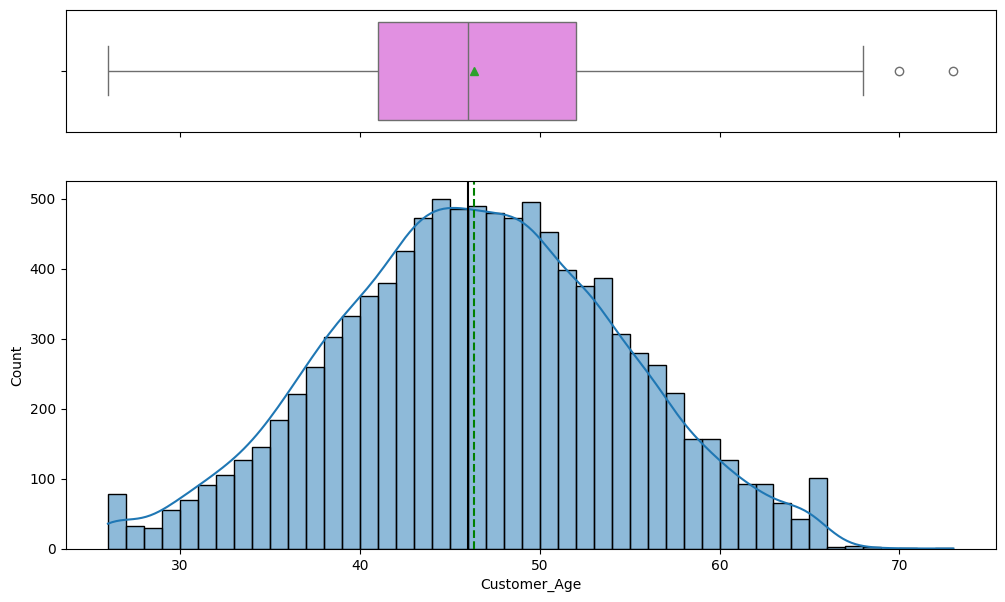

In [39]:
histogram_boxplot(data, "Customer_Age", kde=True)



*   Age shows normal distribution.
*   There are a few outliers on the right end size.
* Mean and median are around 46



Months_on_book

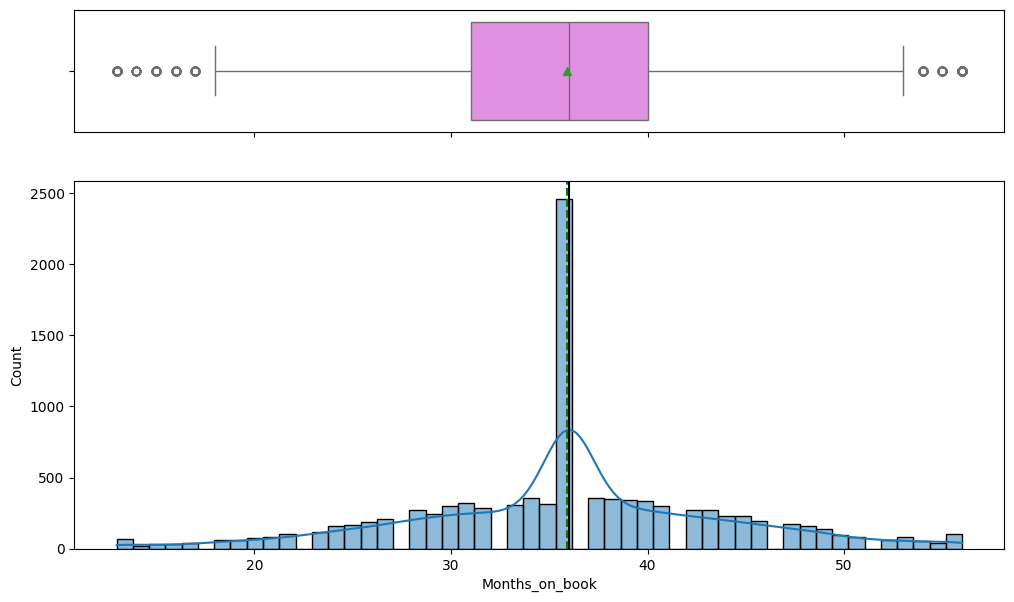

In [40]:
histogram_boxplot(data, "Months_on_book", kde=True)



*   Months_on_book shows normal distribution.
*   Median and mean is around 37 months.
* There are some outliers on both left and right side of the boxplot but this represent real world data and doesn't require any treatment.



Credit_Limit

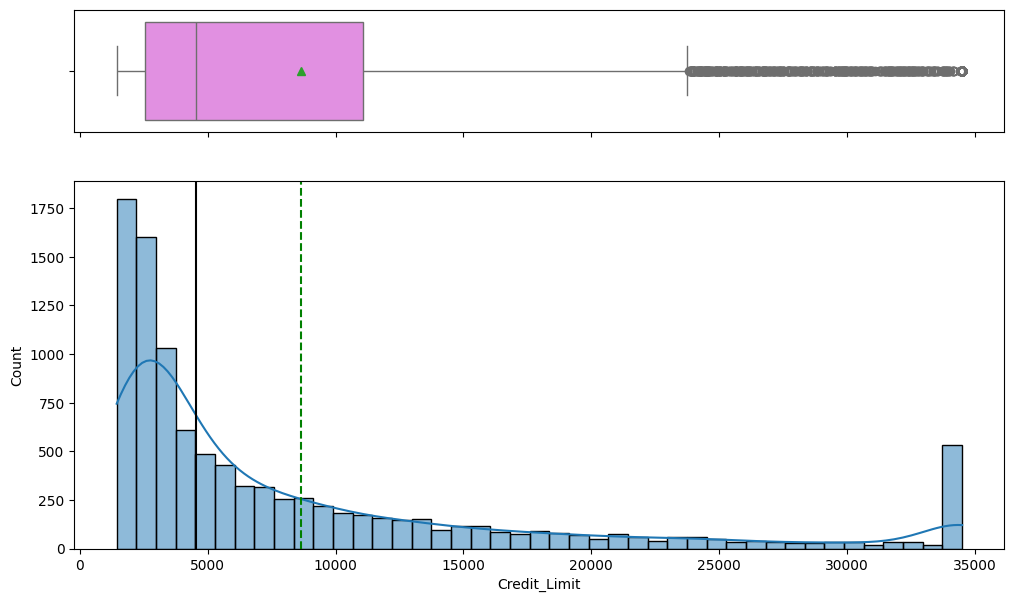

In [41]:
histogram_boxplot(data, "Credit_Limit", kde=True)



*   Credit Limit shows right skewed distribution.
*   There are outliers on the right hand side but they show real world data and don't require any treatment.



Total_Revolving_Bal

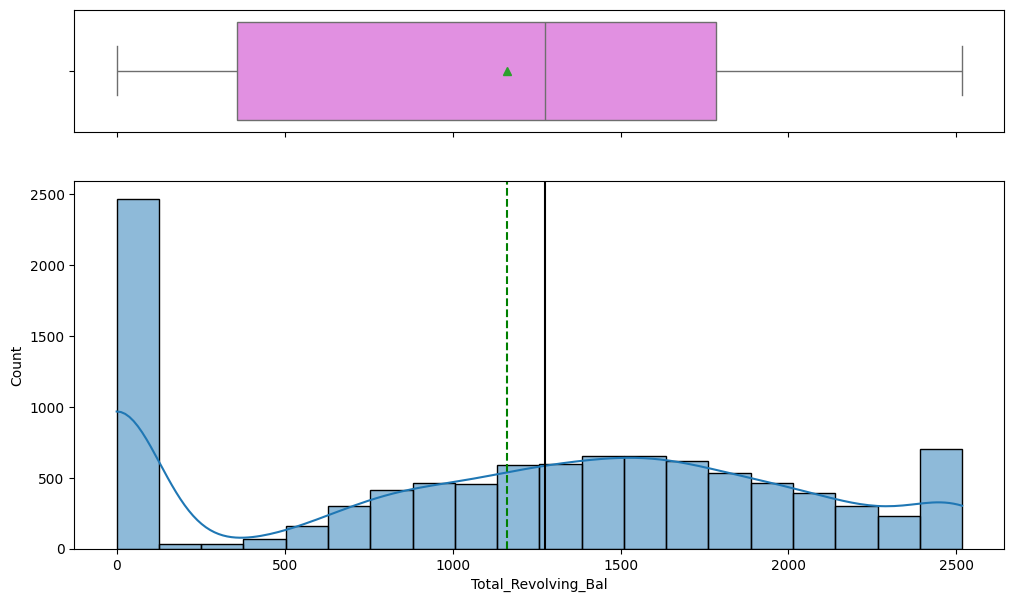

In [42]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)



*   Total Revolving Balance shows normal distribution.
*   There are some outliers on the left end, as this is real customer data it will not require any treatment.



Avg_Open_To_Buy




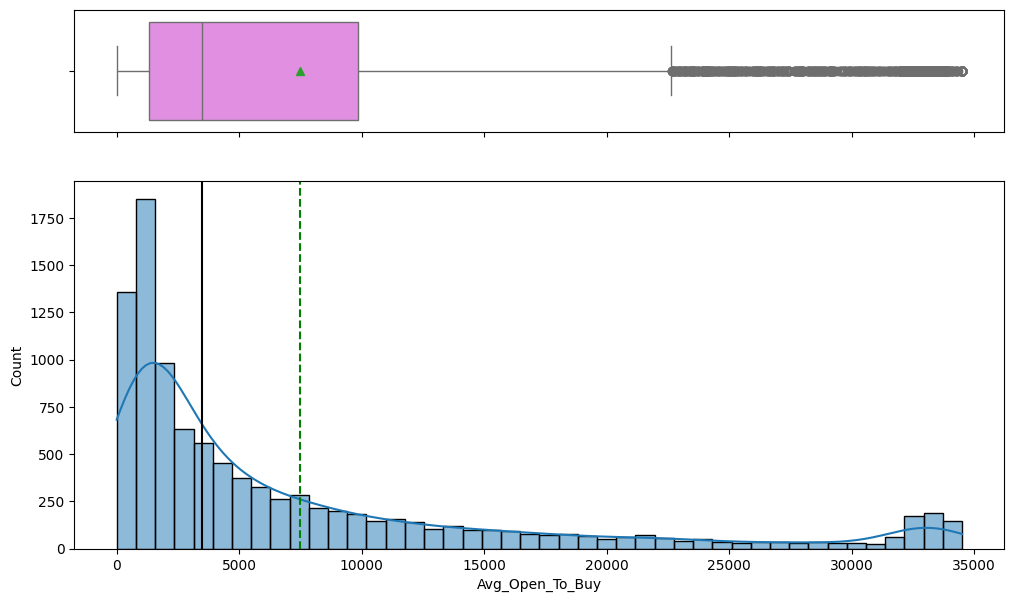

In [43]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)



*   Avg amount left on credit card to use shows right skewed distribution.
*   There are a few outliers on right side, but as they represent real customer data, we will not be removing them.



Total_Trans_Ct

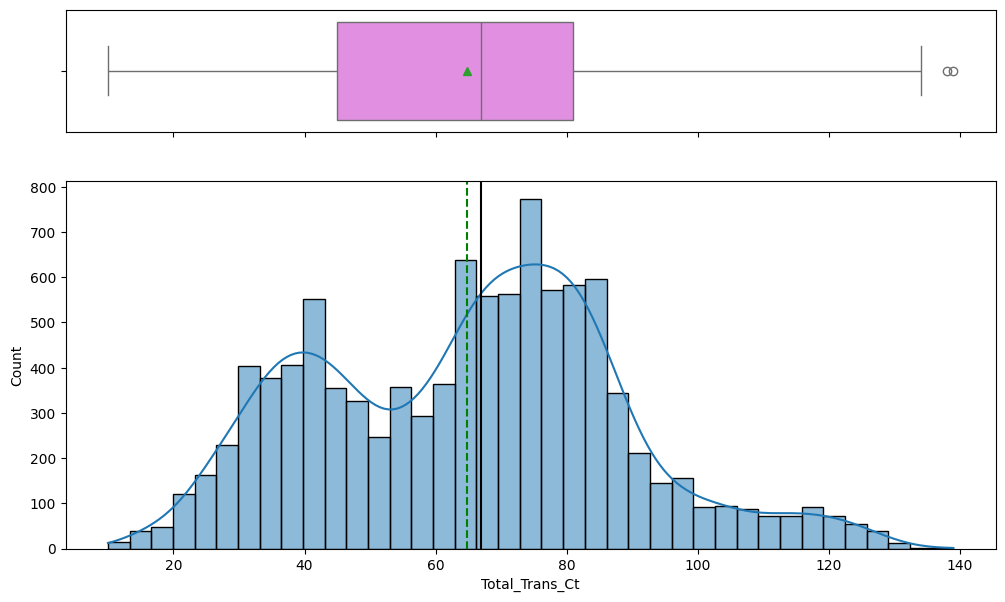

In [44]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)



*  The data shows somewhat normal distribution, though it appears bi-modal
*   Mean and median are pretty close ~65 transactions.
* There are some outliers on right side.



Total_Amt_Chng_Q4_Q1

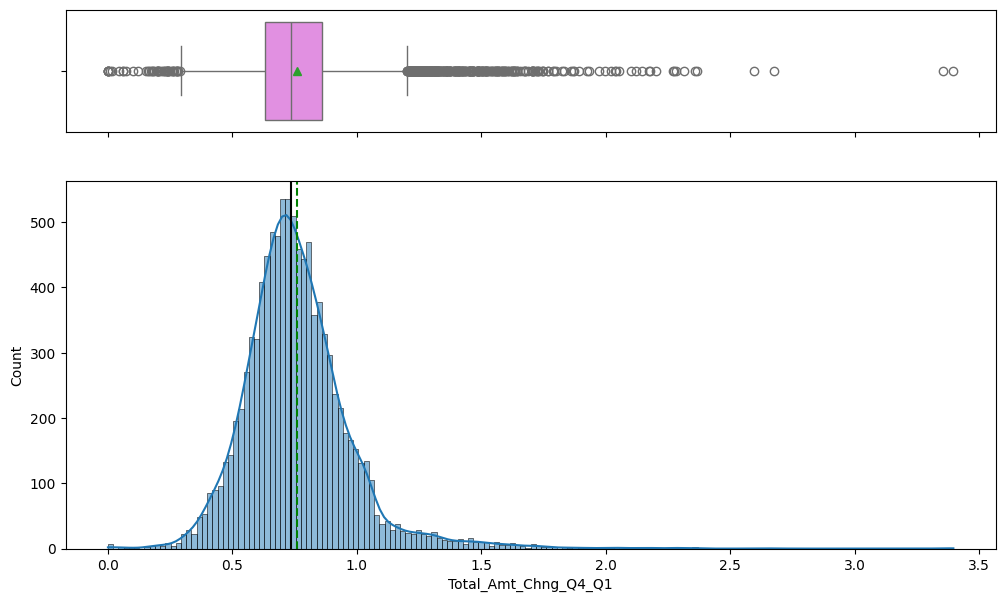

In [45]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)



*   Total_Amt_Chng_Q4_Q1 shows slight right skewed distribution, there are
a lot of outliers in the data as seen on the box plot on both left and right side.
* Mean is around 0.7



Total_Trans_Amt

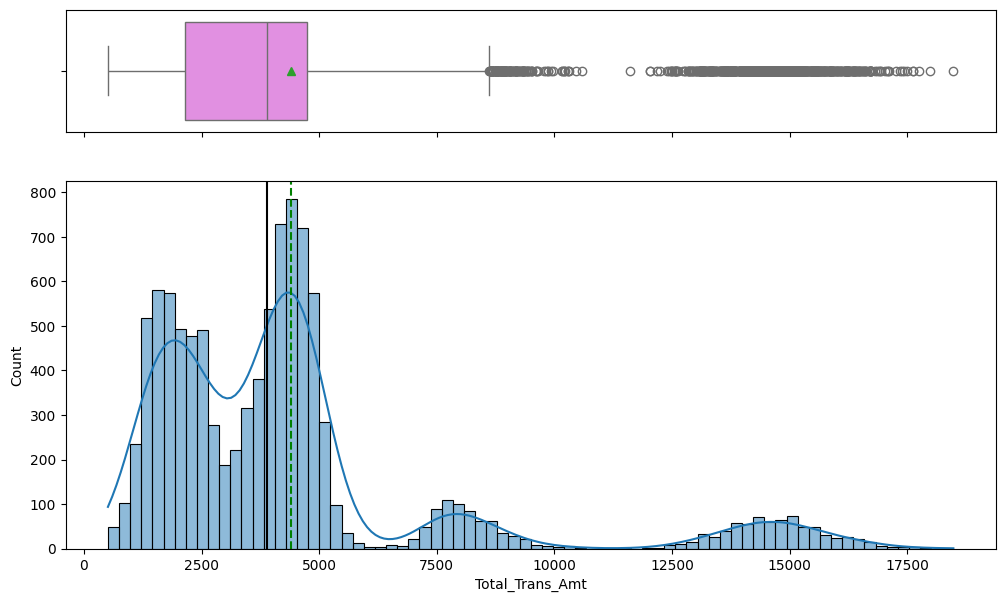

In [46]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)



*   Total_Trans_Amt shows right skewed distribution
*   There are many outloers in the amount spent above 12500, as these represent real customer data, we will not treat these outliers.



Total_Ct_Chng_Q4_Q1

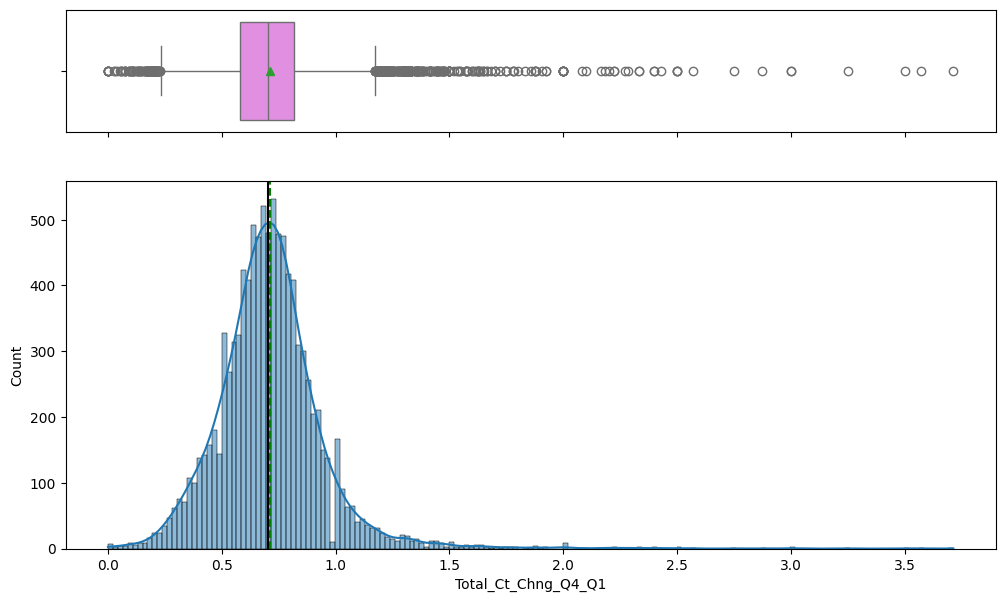

In [47]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)



*   The ratio of total transaction count in the 4th quarter to the total transaction count in 1st quarter (Total_Ct_Chng_Q4_Q1) shows normal distribution
*   Mean and median is around 0.6
*   There are outliers on both left and right side as seen on the boxplot.



Avg_Utilization_Ratio

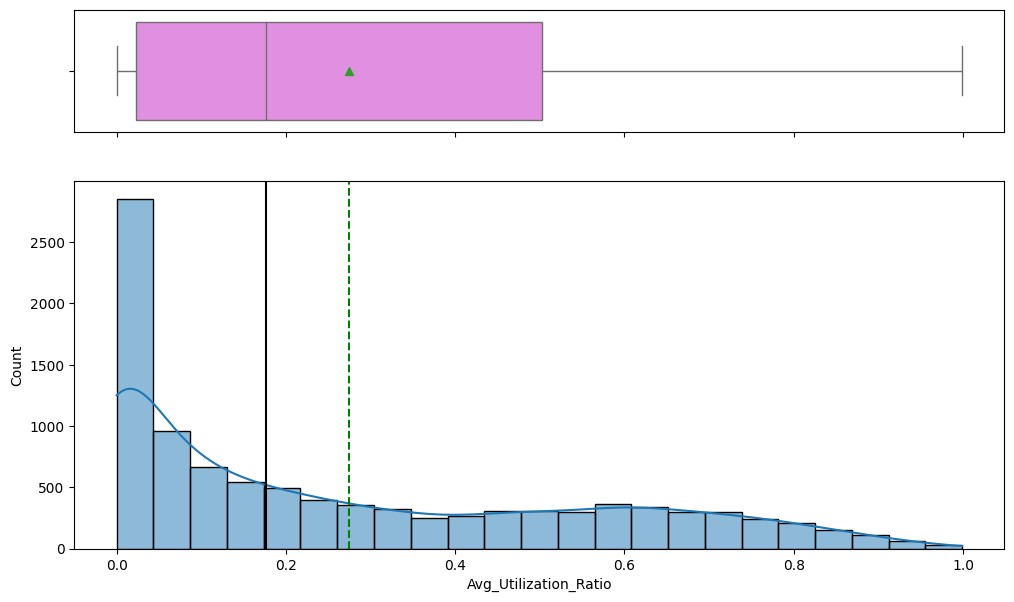

In [48]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)



*   Avg_Utilization_Ratio shows right skewed distribution.
*   Mean is around 0.28, that means that customers on an average use 28% credit.
* There are no outliers for the Avg_Utilization_Ratio column.



Dependent_count

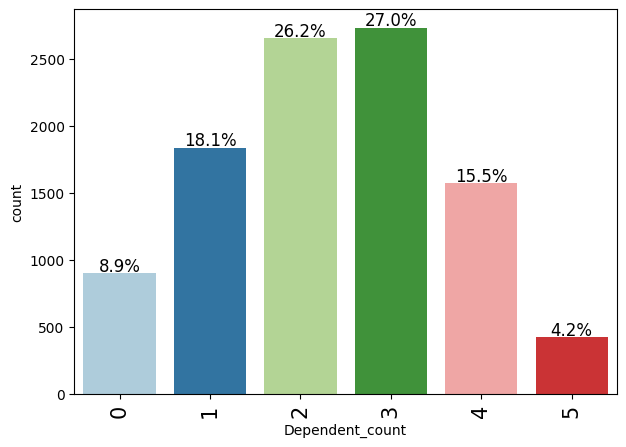

In [49]:
labeled_barplot(data, "Dependent_count", perc=True)



*   Majority customers have 2 or 3 dependent count



Total_Relationship_Count

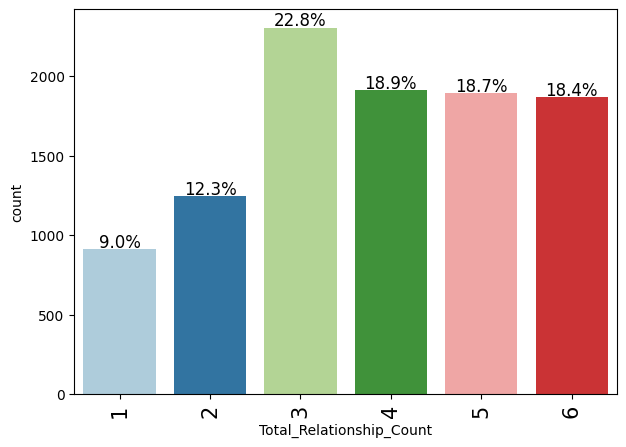

In [50]:
labeled_barplot(data, "Total_Relationship_Count", perc=True)



*   Majority of the customers have 3 or 4 products with the bank.



Months_Inactive_12_mon

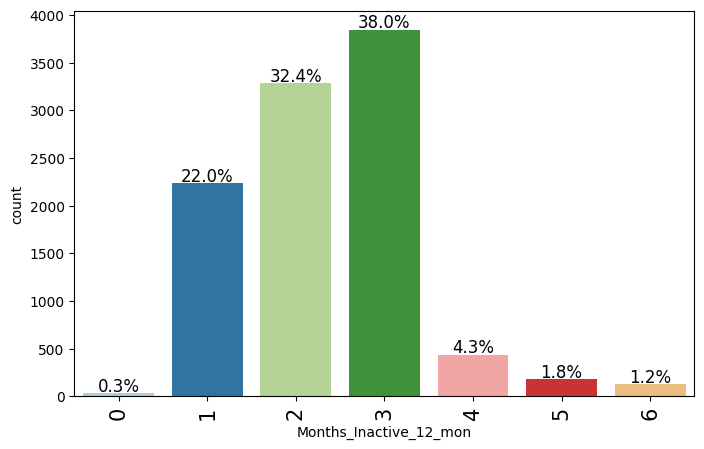

In [51]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)



*   Most customers have been inactive for 2-3 months in the last 12 months.



Contacts_Count_12_mon

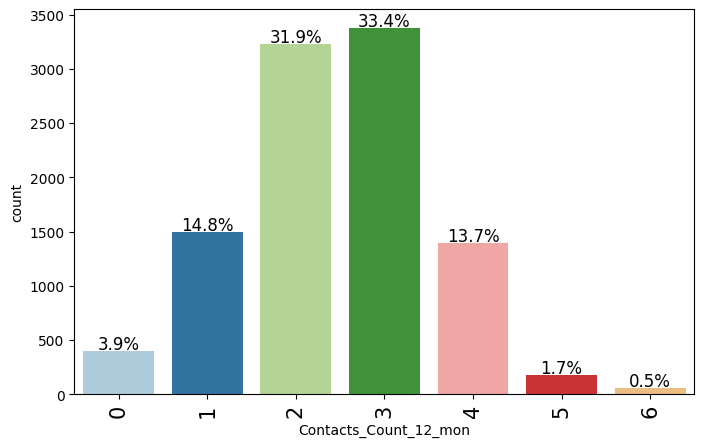

In [52]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)



*   Most customers have been contacted between 2-3 times in the last 12 months.


Gender

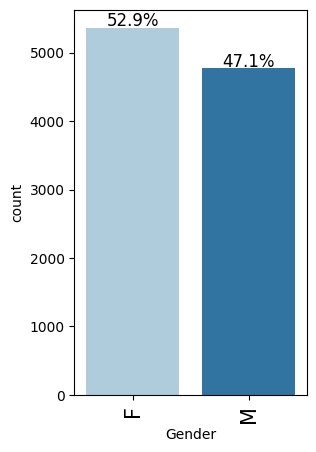

In [53]:
labeled_barplot(data, "Gender", perc=True)



*   The dataset contains higher number of females than males.




Education_Level

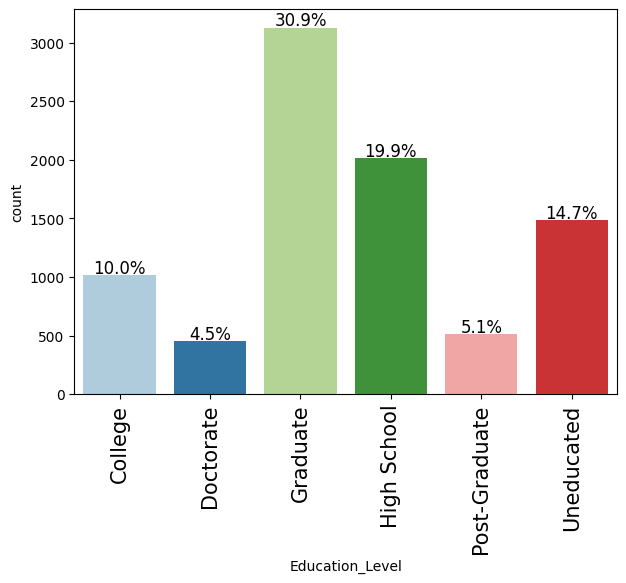

In [54]:
labeled_barplot(data, "Education_Level", perc=True)



*   Majority customers are graduates followed by customers who completed high school eductaion.




Marital_Status

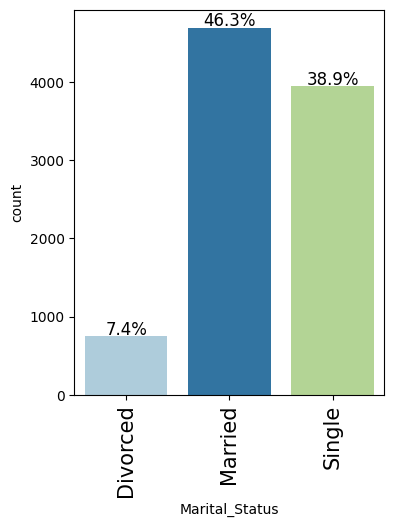

In [55]:
labeled_barplot(data, "Marital_Status", perc=True)



*   Majority customers are married followed by those who are single.



Income_Category

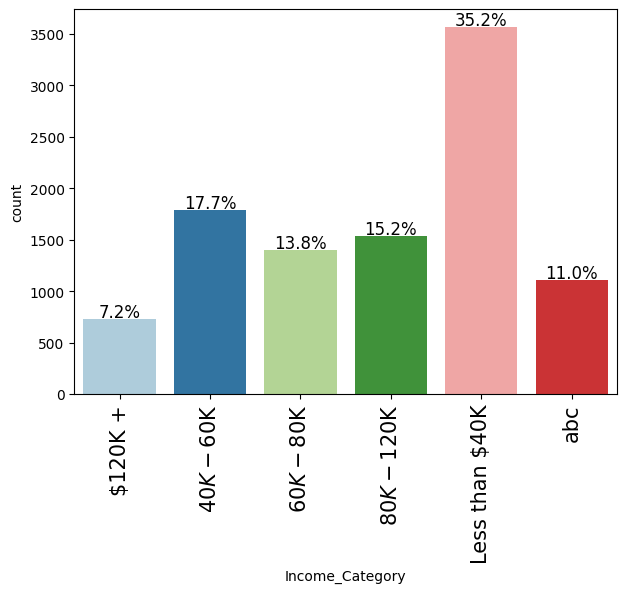

In [56]:
labeled_barplot(data, "Income_Category", perc=True)



*   Majority customers fall in the income category -  less than $40k
*   We see category 'abc' which likely looks like customers who have not provided their income category.



Card_Category

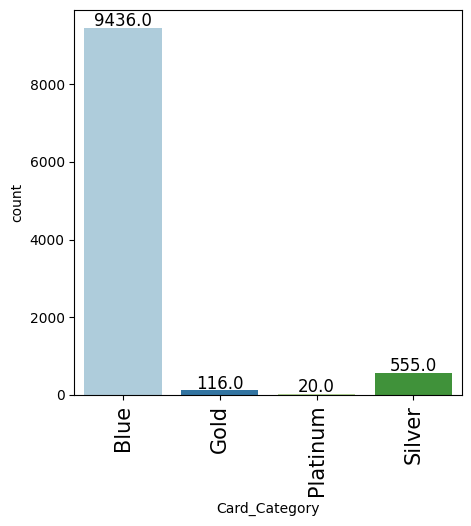

In [57]:
labeled_barplot(data, "Card_Category")



*   Majority customers have Blue category card
*   Only 20 customers have Platinum category card.



Attrition_Flag

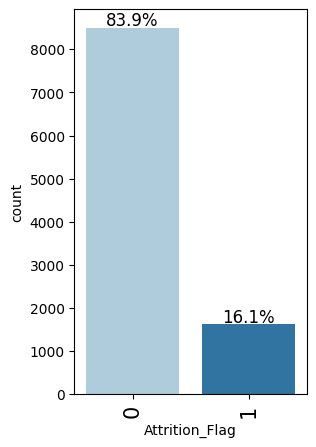

In [58]:
labeled_barplot(data, "Attrition_Flag", perc=True)



*   Majority customers are non-attrited.
* ~ 84% are existing customers and ~16% are attrited.


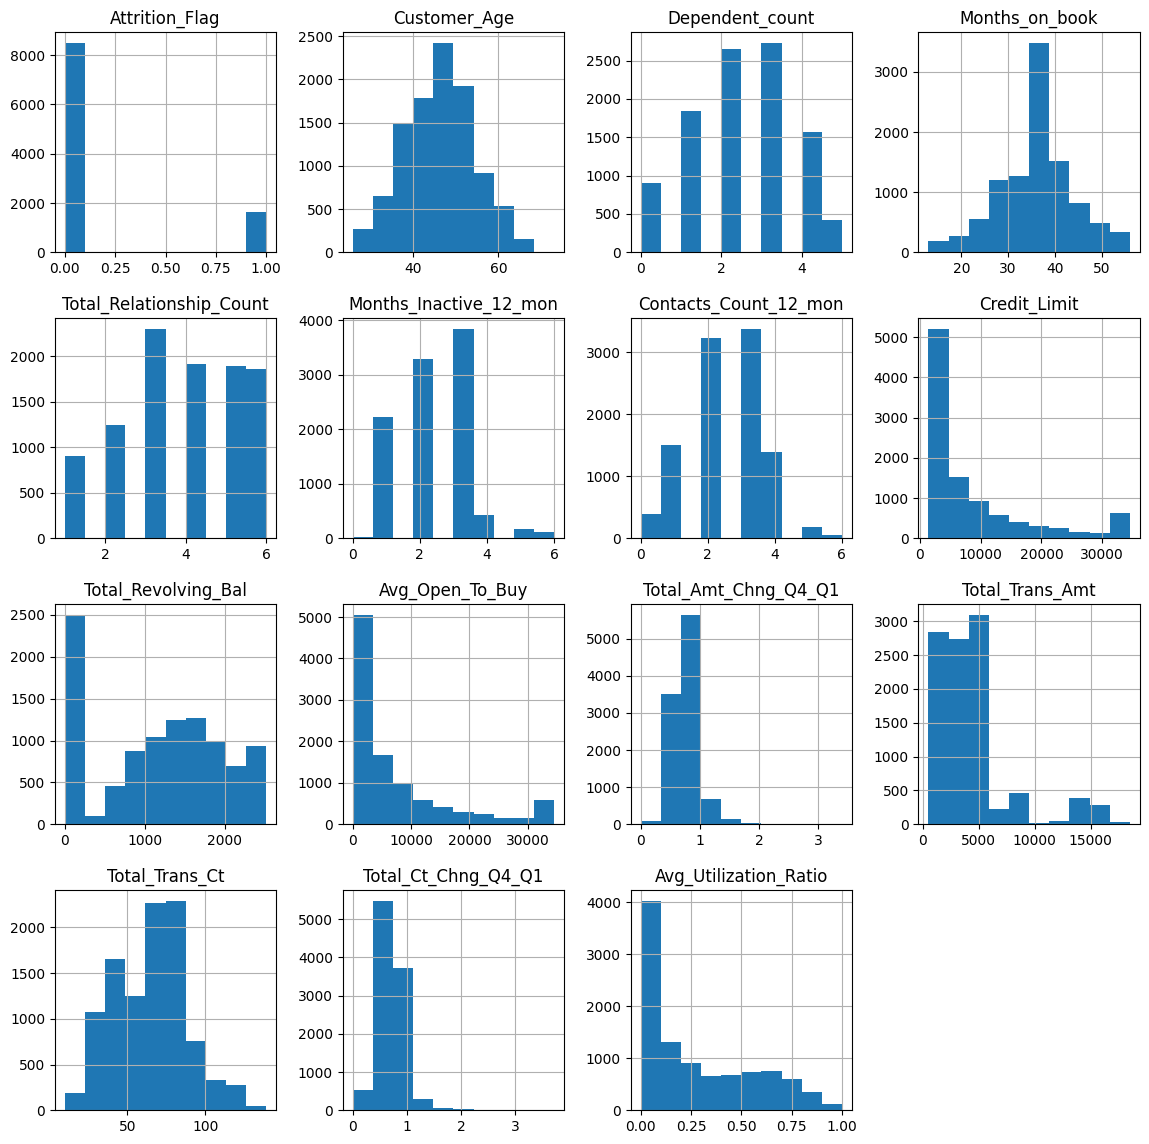

In [59]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

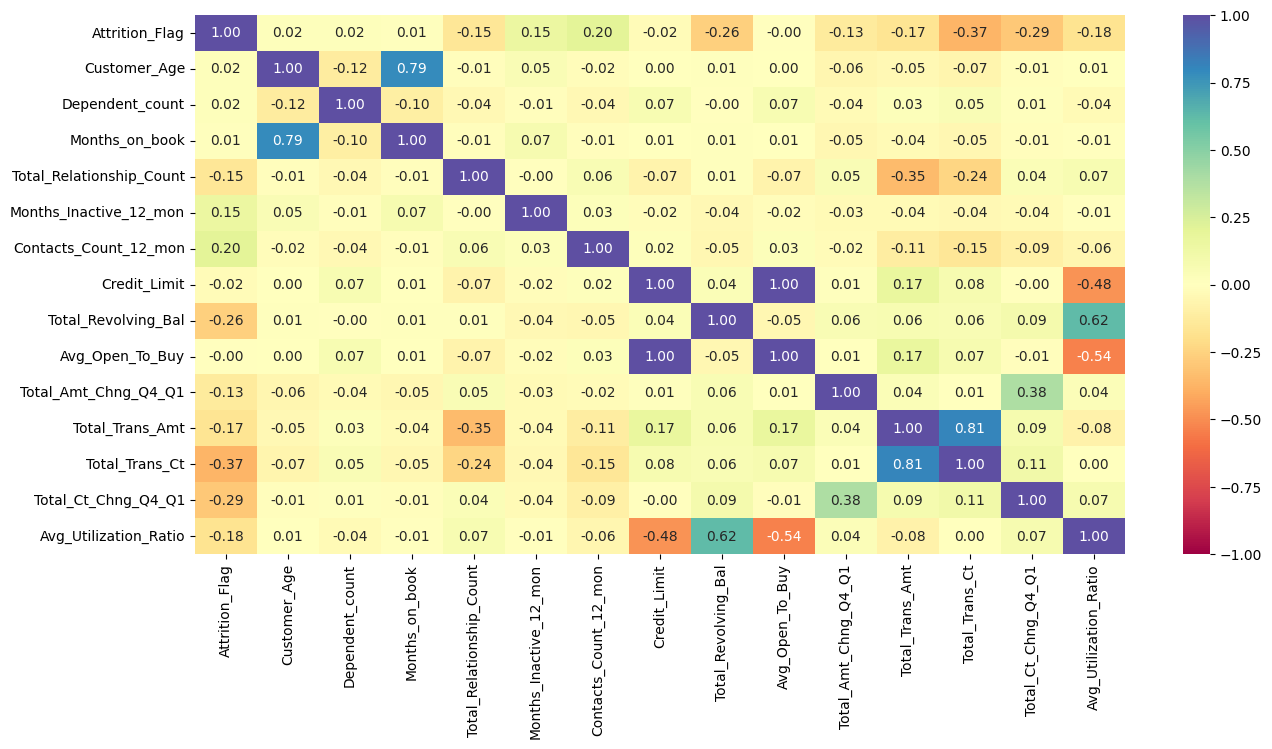

In [60]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



* Credit limit and Avg. Open to Buy show strong positive correlation  
* Months on Book and Customer Age show a strong positive correlation.
*   Total Revolving Balance and Avg. Utilization ratio show strong positive correlation.
* Credit Limit and Avg. Utilization Ratio show negative correlation.



`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


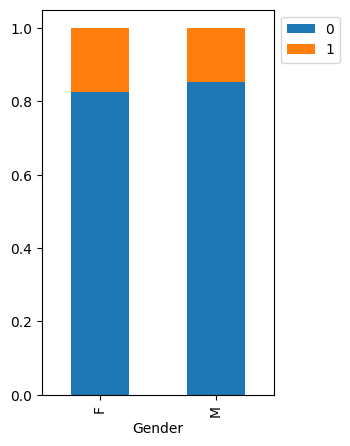

In [61]:
stacked_barplot(data, "Gender", "Attrition_Flag")



*   The dataset has more female customers than males, so we see more attrited female customers than males.
* There is no significant impact of gender on attrition of customers.



`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


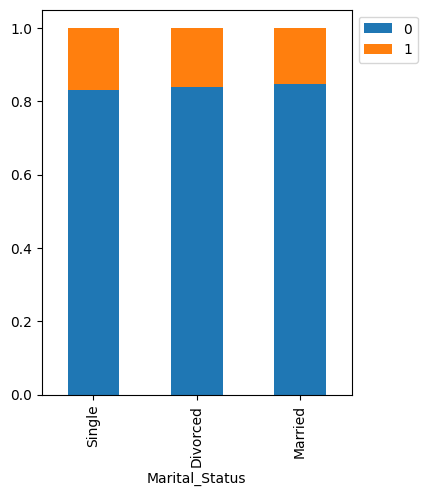

In [62]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag") # create distribution_plot for Attrition_Flag vs Marital_Status



*   Single customers show slightly higher attrition than married or divorced.
*   Married customers have most number of attrited customers than the other two categories.



`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


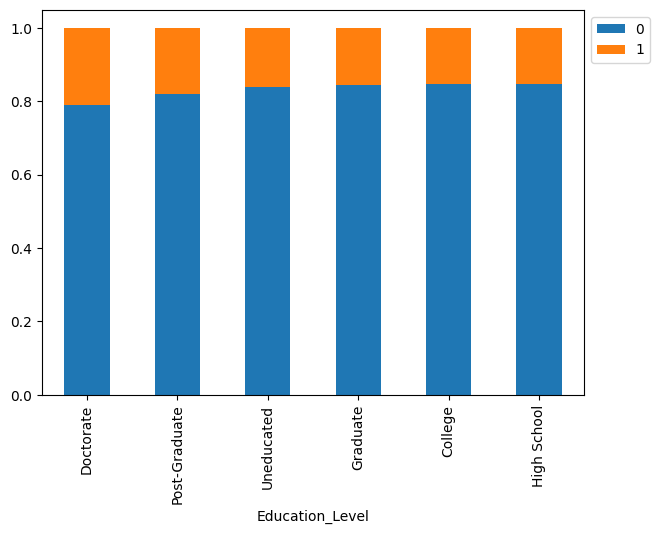

In [63]:
stacked_barplot(data,"Education_Level", "Attrition_Flag") # distribution_plot for Attrition_Flag vs Education_Level



*   Graduate customers make up majority of attrited customers.
*   Doctrate customers show highest (~20%) proportion of attrited customers vs total customers in that education category.



`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


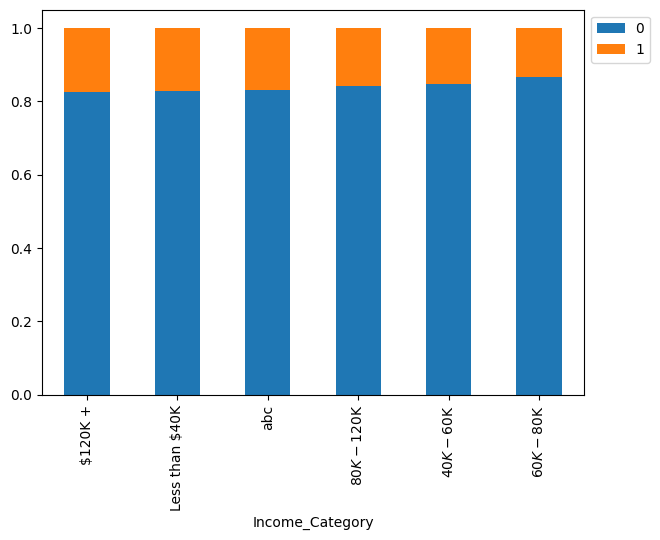

In [64]:
stacked_barplot(data,"Income_Category", "Attrition_Flag") # distribution_plot for Attrition_Flag vs Income_Category



*   Customers with income category less than $40k make up majority of the attrited customers
*   Percentage of attrited customers vs total customers is not affected much by income category.



`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


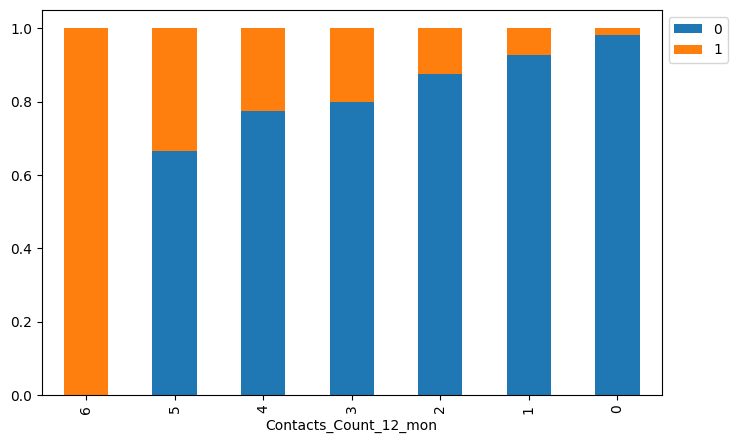

In [65]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag") # distribution_plot for Attrition_Flag vs Contacts_Count_12_mon



*   Attrited customers appear to have been contacted more in last 12 months.
*   For customers contacted more than 6 times, all have been attrited.



**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


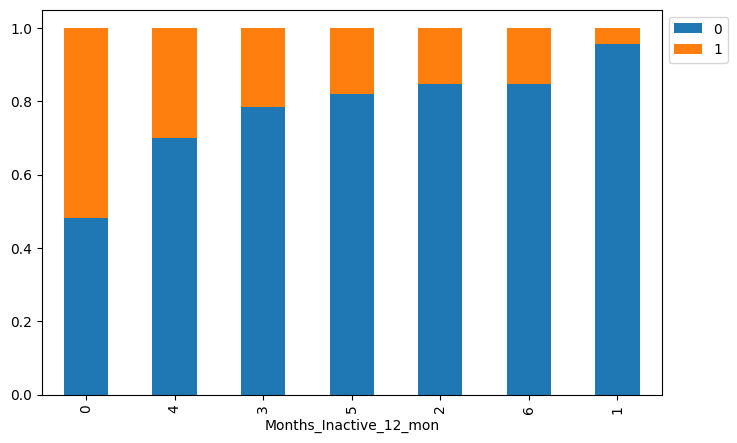

In [66]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon



*   Attrited customers show inacativity for more months in the last 12 months in comparison to non-attrited customers.

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


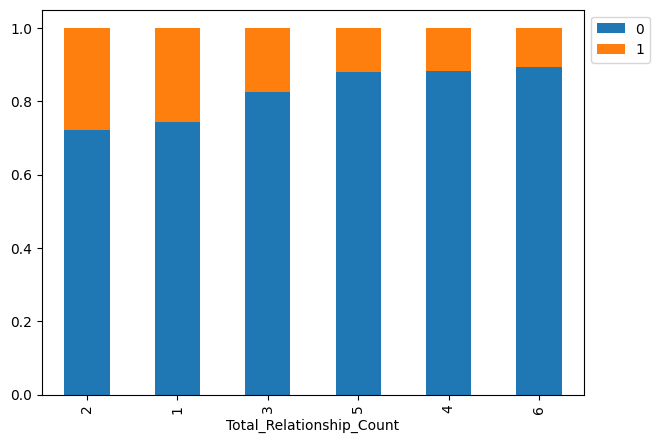

In [67]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count



*   Attrited customers have fewer products with the bank in comparison to non-attrited customers.




`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


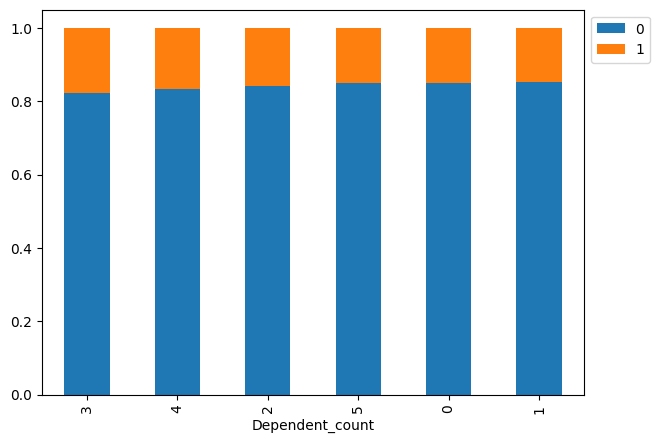

In [68]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag") # create distribution_plot for Attrition_Flag vs Dependent_count



*   Dependent count has no significant impact on customer attrition.


`Total_Revolving_Bal` vs `Attrition_Flag`

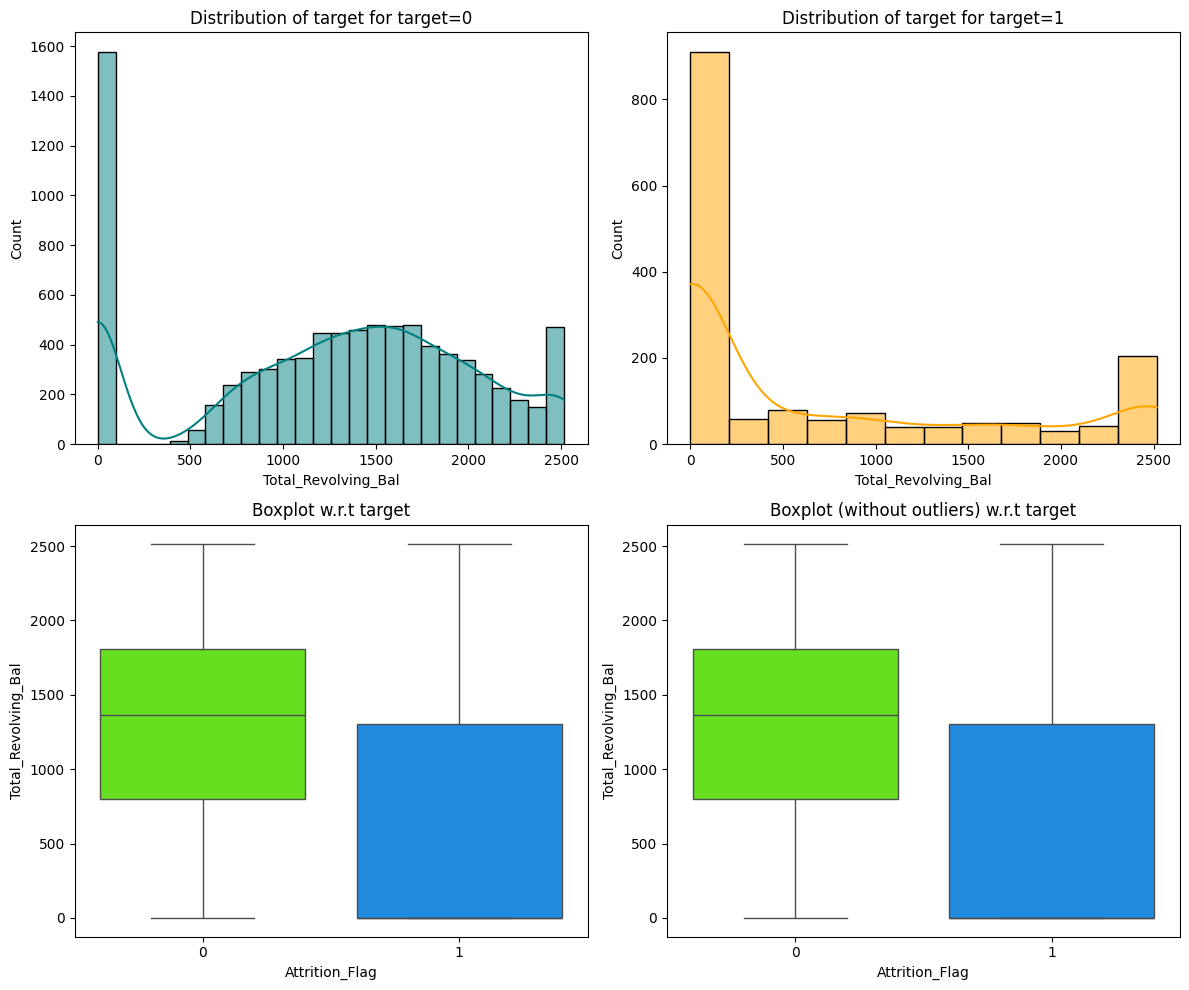

In [69]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")



*   Attrited customers show low revolving balance in comparsion to existing customers
*   Customers with high revolving balance are less likely to attrite.



`Attrition_Flag vs Credit_Limit`

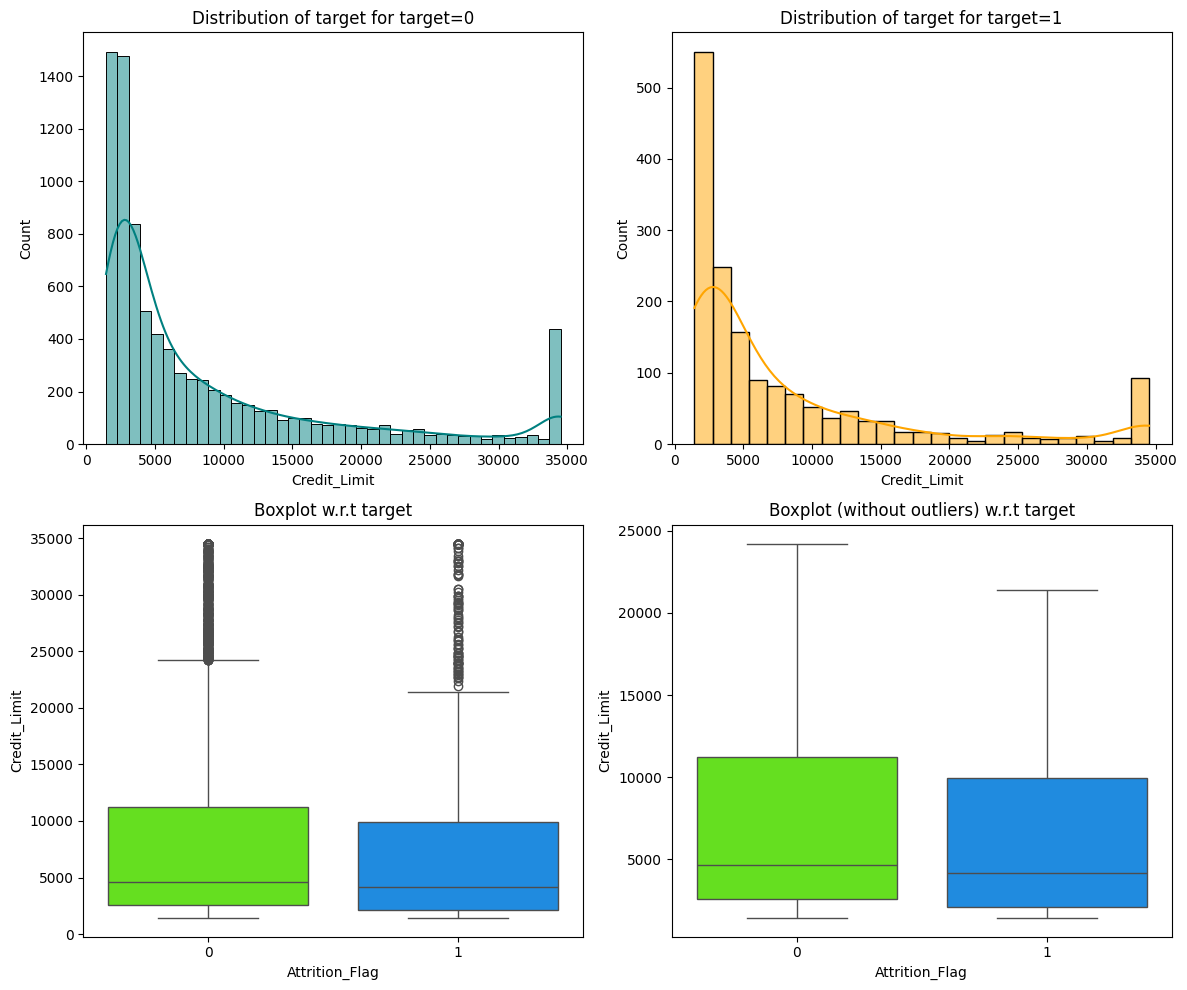

In [70]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag") # create distribution_plot for Attrition_Flag vs Credit_Limit



*   Majority customers have credit limit less than $10k
*   Credit limit has no significant impact on attrition rate.
*   Credit limit for both attrited and non-attrited customers shows right skew.


`Attrition_Flag vs Customer_Age`

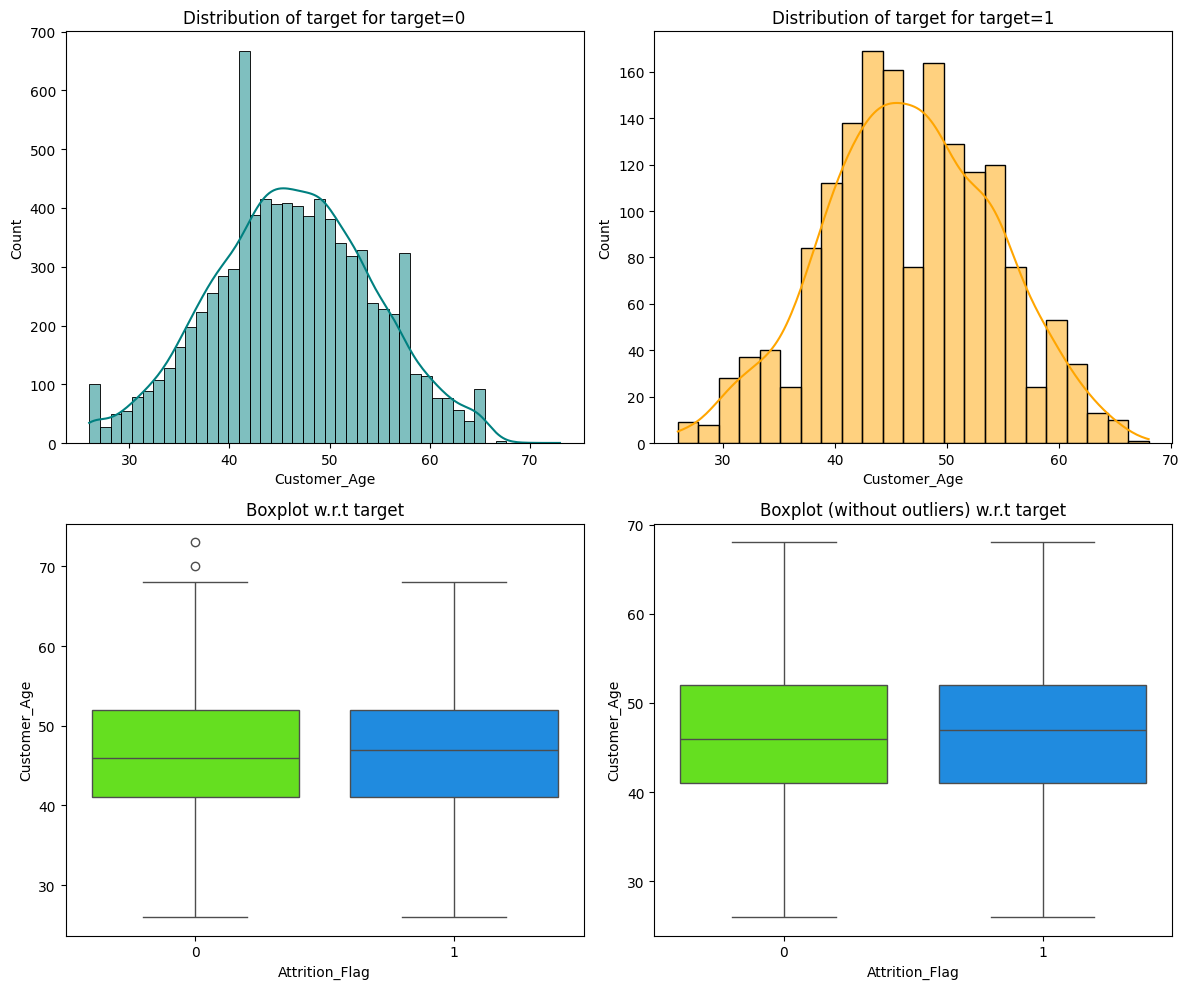

In [71]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age



*   The distribution of age for both existing and attrited customes shows normal distribution.
*  Most customers are in age range 40-50.
* There are few outliers, older age customers as shown on boxplot.



`Total_Trans_Ct` vs `Attrition_Flag`

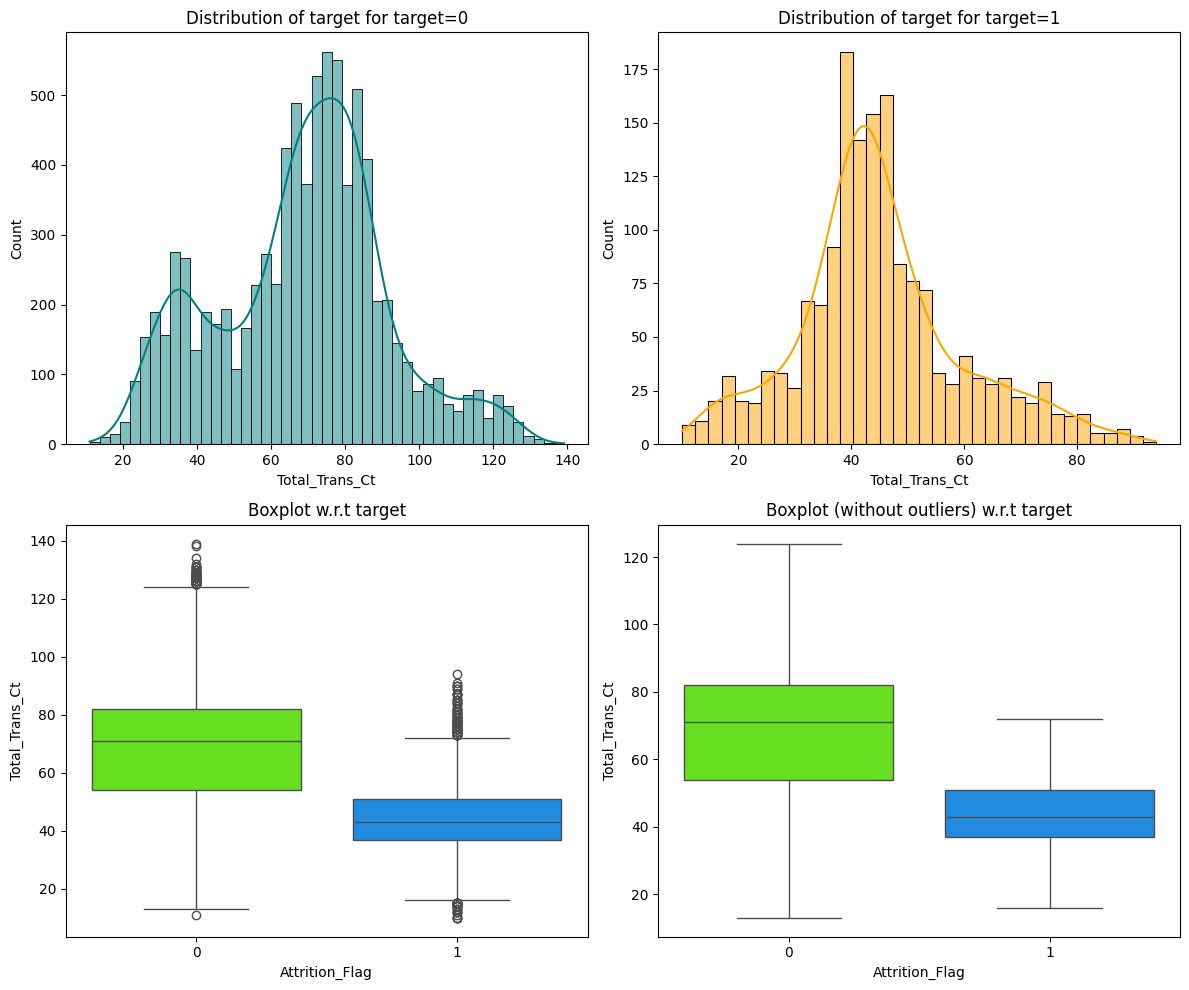

In [72]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") # distribution_plot for Total_Trans_Ct vs Attrition_Flag



*   Attrited customers show lower transaction count than existing customers.



`Total_Trans_Amt` vs `Attrition_Flag`

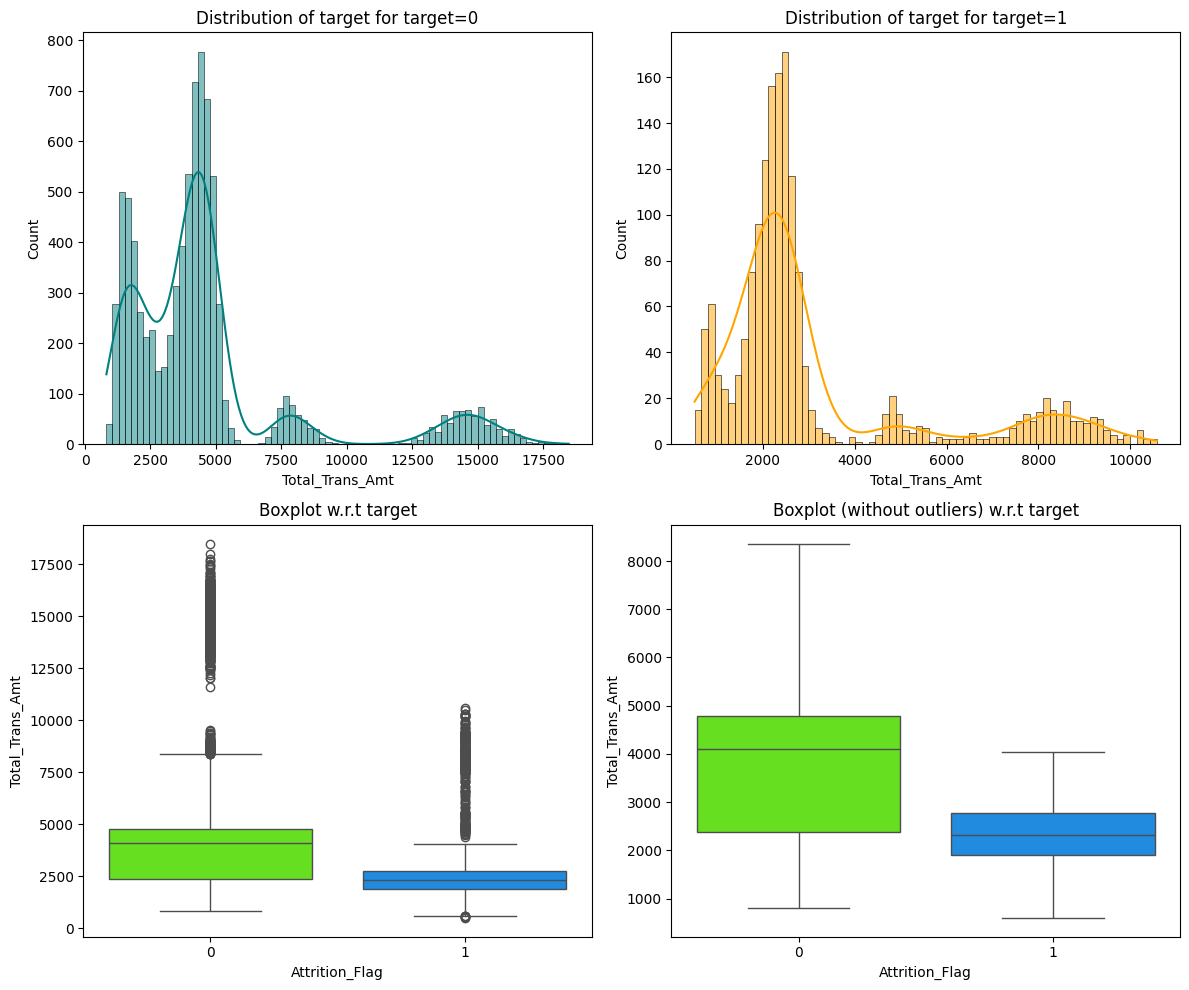

In [73]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag



*   Attrited customers have lesser total transaction amount in comparison to existing customers.



**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

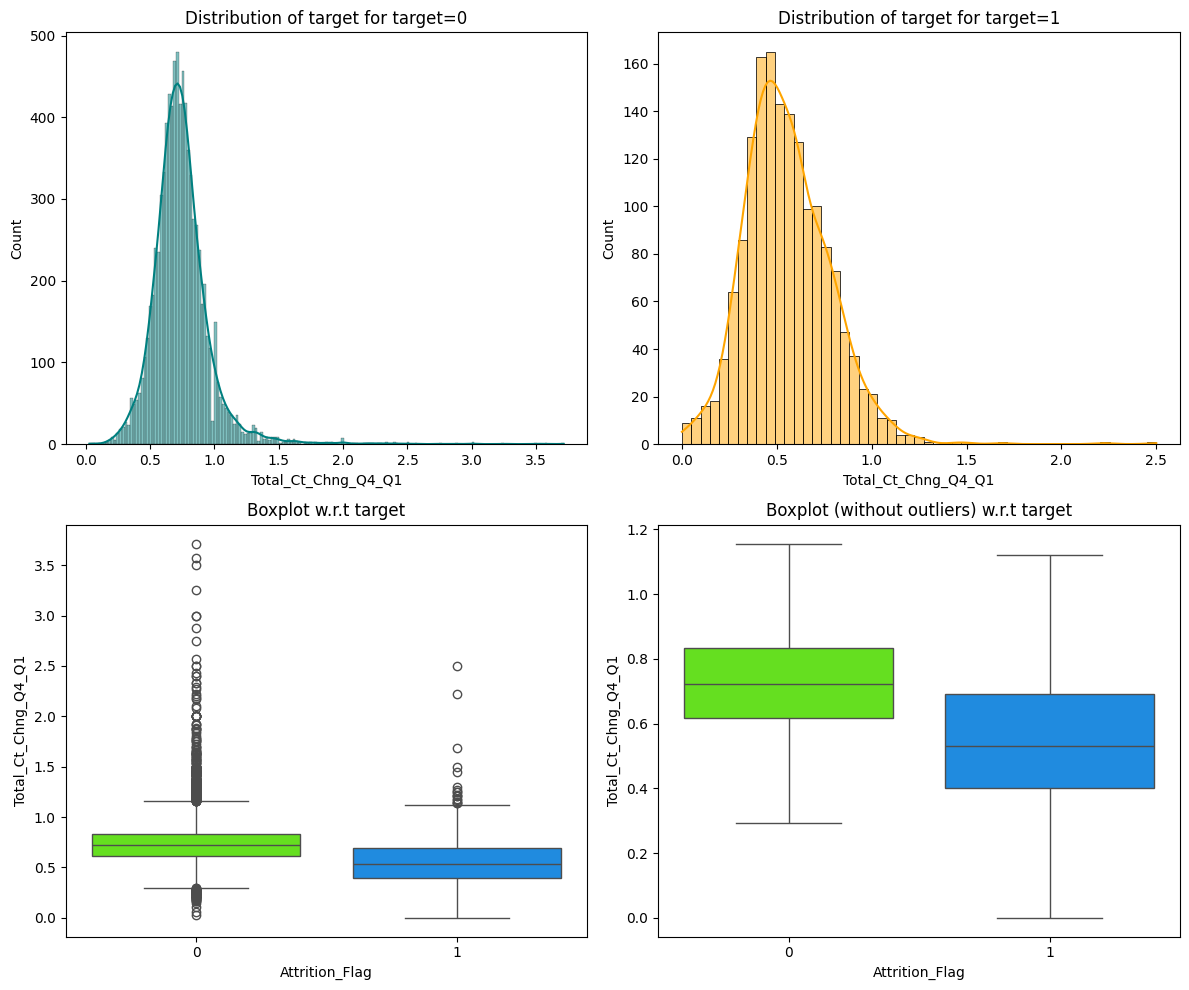

In [74]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") # distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag



*   Attrited customets tend to have smaller ratio of change in balance in q4 to q1

`Avg_Utilization_Ratio` vs `Attrition_Flag`

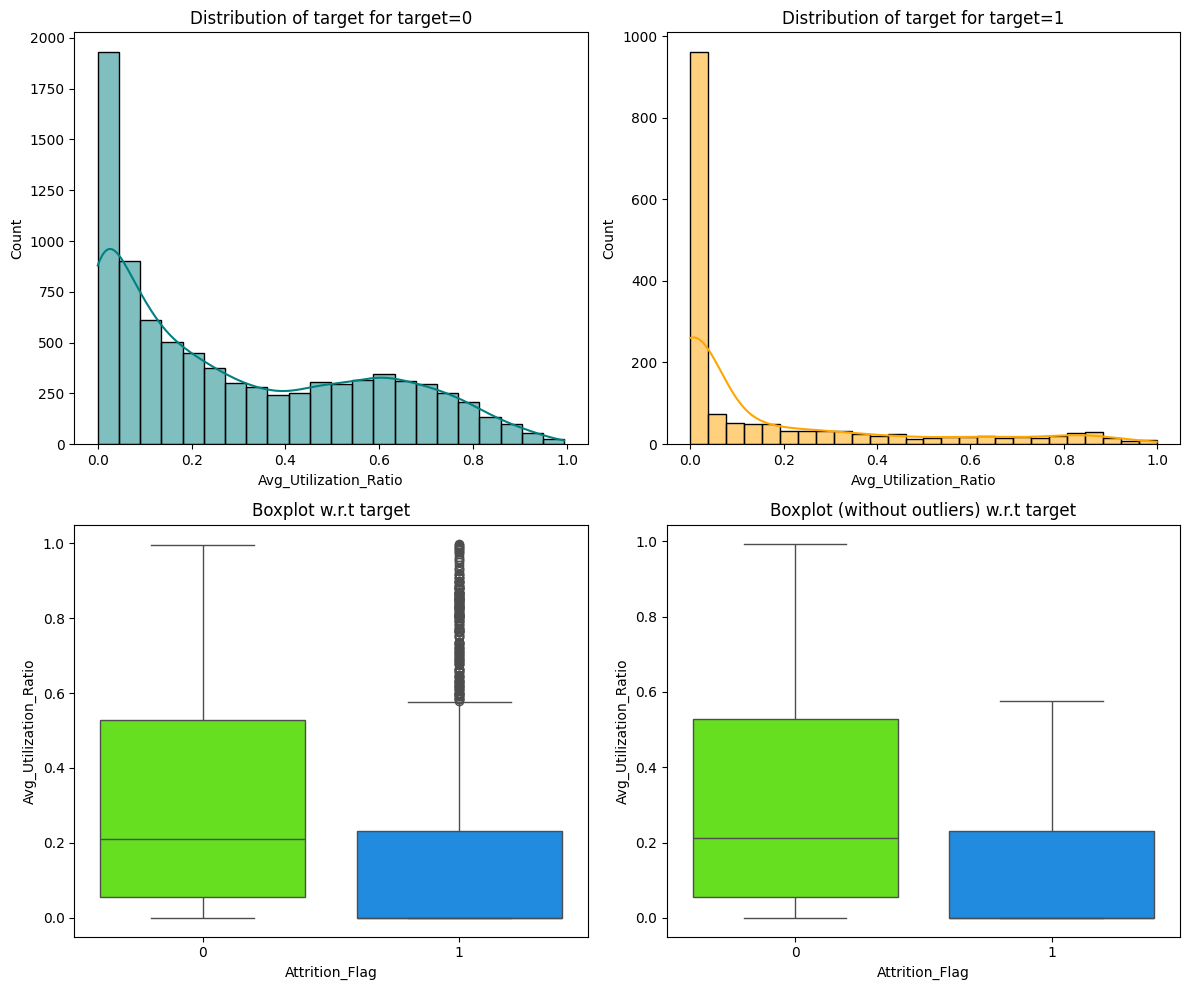

In [75]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag



*   Attrited customers have a higher proportion of near zero avg utilization ratio than existing customers.


`Attrition_Flag vs Months_on_book`

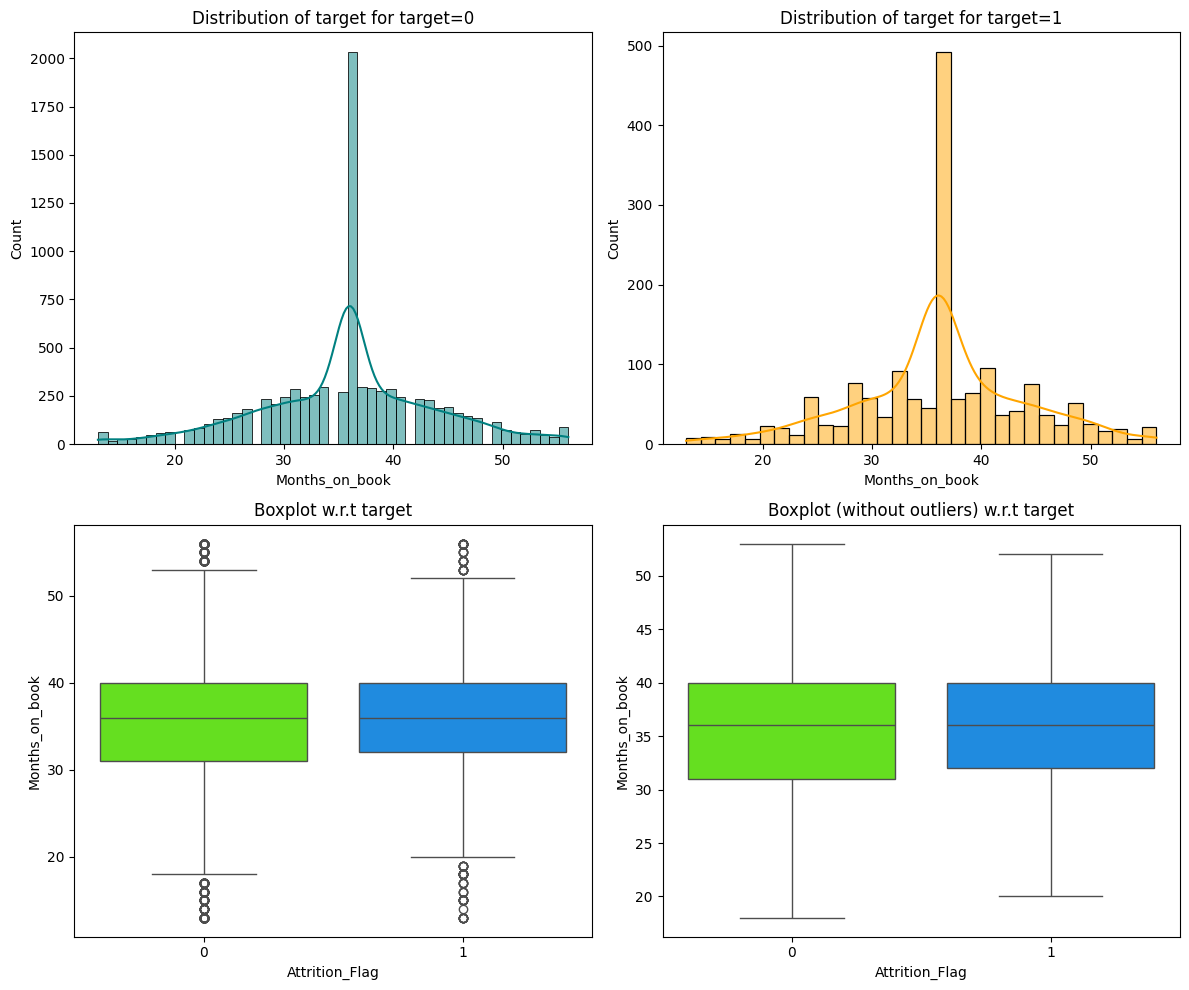

In [76]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag") # distribution_plot for Attrition_Flag vs Months_on_book



*   There is no significant difference in months on book between attrited and non-attrited customers



`Attrition_Flag vs Total_Revolving_Bal`

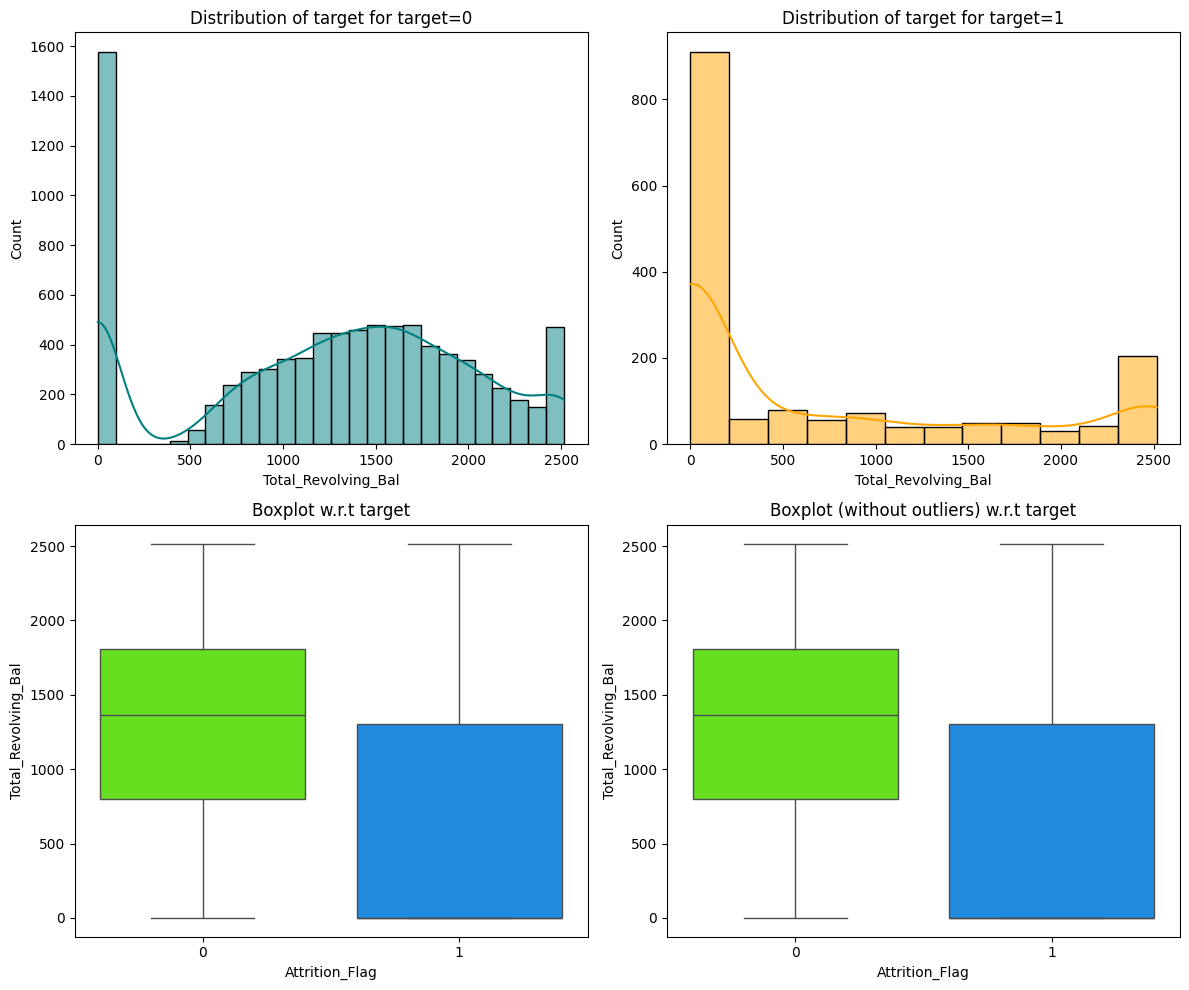

In [77]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag") # create distribution_plot for Attrition_Flag vs Total_Revolving_Bal



*   Attrited customers have lower revolving balance in comparison to existing customers



`Attrition_Flag vs Avg_Open_To_Buy`

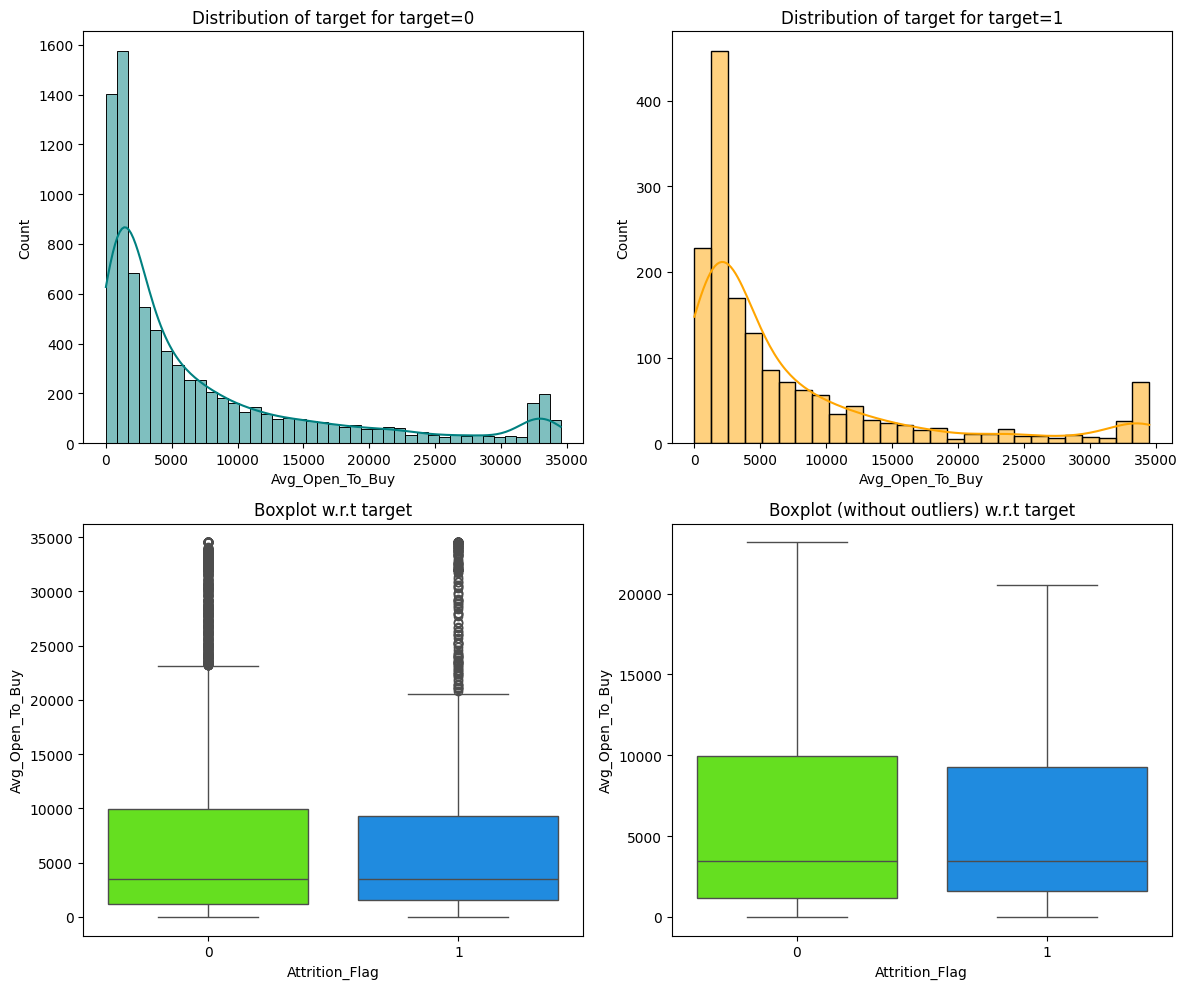

In [78]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag") # create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy



*   Avg_Open_To_Buy has no significant impact on customer attrition



## Data Preprocessing

### Outlier Detection

In [85]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

def show_outliers(feature: str, data):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

In [86]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509




*   As from the Exploratory Data Analysis above the outliers are real customer data and don't seem to be error data.



### Train-Test Split

In [89]:
# creating the copy of the dataframe
data1 = data.copy()

In [90]:
data1["Income_Category"].replace("abc", np.nan, inplace=True) # replace the anomalous values with NaN

In [91]:
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [93]:
# Dividing train data into X and y
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [94]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Missing value imputation

Missing Value Imputation should be done individually for train and test datasets to prevent data leak.

In [95]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [96]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [97]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute]) # impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [98]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

### Encoding categorical variables

In [99]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [104]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

In [101]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [107]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype('float')

X_val = pd.get_dummies(X_val, drop_first=True) ## Complete the code to impute missing values in X_val
X_val = X_val.astype('float')

X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = X_test.astype('float')

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 29 columns.

In [106]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40.000,2.000,21.000,6.000,4.000,3.000,20056.000,1602.000,18454.000,0.466,1687.000,46.000,0.533,0.080,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
498,44.000,1.000,34.000,6.000,2.000,0.000,2885.000,1895.000,990.000,0.387,1366.000,31.000,0.632,0.657,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
4356,48.000,4.000,36.000,5.000,1.000,2.000,6798.000,2517.000,4281.000,0.873,4327.000,79.000,0.881,0.370,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
407,41.000,2.000,36.000,6.000,2.000,0.000,27000.000,0.000,27000.000,0.610,1209.000,39.000,0.300,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
8728,46.000,4.000,36.000,2.000,2.000,3.000,15034.000,1356.000,13678.000,0.754,7737.000,84.000,0.750,0.090,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


## Model Building

### Model evaluation criterion

The performance of the model will depend both on the correct predictions made by the model and error.

There are can be wrong predictions as:


*   False Positives: Predicting the customer will attrite and they don't, we will be targeting customers and spending time and resources on them and they don't attrite - **Loss of resources**
*   False Negatives: Predicting a customer will not close their credit card account and the customer does i.e. losing on a credit card customer for the bank because that customer will not be targeted by the business team when he should be targeted - **Loss of opportunity**



**Which metric to optimize?**

* We want to minimize false negatives because if a model predicts that a customer will not attrite and he does then it leads to loss of opportunity.
* We will try to **maximize recall** to have lesser false negatives.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [108]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [194]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(n_jobs=-1, eval_metric="auc", random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
metrics = ["Accuracy", "Recall", "Precision", "F1"]

performance_df_train = pd.DataFrame(columns=["Model"] + metrics)
performance_df_val = pd.DataFrame(columns=["Model"] + metrics)

for name, model in models:
    model.fit(X_train, y_train)
    perf_df = model_performance_classification_sklearn(model, X_train, y_train)
    perf_df["Model"] = name
    performance_df_train = pd.concat([performance_df_train, perf_df], ignore_index=True)
    perf_df_val = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df_val["Model"] = name
    performance_df_val = pd.concat([performance_df_val, perf_df_val], ignore_index=True)


print("Training Performance:\n")
print(performance_df_train)
print("\nValidation Performance:\n")
print(performance_df_val)

Training Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.997   0.986      0.997 0.991
1  Random forest     1.000   1.000      1.000 1.000
2            GBM     0.973   0.875      0.952 0.912
3        XGBoost     1.000   1.000      1.000 1.000
4  Decision tree     1.000   1.000      1.000 1.000
5       AdaBoost     0.944   0.777      0.860 0.816

Validation Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.956   0.813      0.904 0.856
1  Random forest     0.957   0.798      0.922 0.855
2            GBM     0.968   0.859      0.936 0.896
3        XGBoost     0.971   0.902      0.919 0.910
4  Decision tree     0.939   0.816      0.806 0.811
5       AdaBoost     0.957   0.813      0.911 0.859




*   Random Forest, XGBoost and Decision Tree show recall of 1.0 and are overfitting the data.
*   Gradient Boosting has low recall score in both training and validation, possibly because of underfitting.
* Adaboost has low recall in training and higher in validation, its underfitting


### Model Building with Oversampled data


In [195]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [196]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 29)
After OverSampling, the shape of train_y: (10198,) 



In [202]:
models = []
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(n_jobs=-1, eval_metric="auc", random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
metrics = ["Accuracy", "Recall", "Precision", "F1"]

performance_df_train_over = pd.DataFrame(columns=["Model"] + metrics)
performance_df_val_over = pd.DataFrame(columns=["Model"] + metrics)

for name, model in models:
    model.fit(X_train_over, y_train_over)
    perf_df = model_performance_classification_sklearn(
        model, X_train_over, y_train_over
    )
    perf_df["Model"] = name
    performance_df_train_over = pd.concat([performance_df_train_over, perf_df], ignore_index=True)
    perf_df_val = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df_val["Model"] = name
    performance_df_val_over = pd.concat([performance_df_val_over, perf_df_val], ignore_index=True)


# Displaying the performance metrics DataFrame
print("Training Performance:\n")
print(performance_df_train_over)
print("\nValidation Performance:\n")
print(performance_df_val_over)

Training Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.998   0.998      0.999 0.998
1  Random forest     1.000   1.000      1.000 1.000
2            GBM     0.981   0.981      0.981 0.981
3        XGBoost     1.000   1.000      1.000 1.000
4  Decision tree     1.000   1.000      1.000 1.000
5       AdaBoost     0.955   0.959      0.950 0.955

Validation Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.946   0.831      0.831 0.831
1  Random forest     0.954   0.831      0.874 0.852
2            GBM     0.960   0.874      0.877 0.876
3        XGBoost     0.966   0.890      0.898 0.894
4  Decision tree     0.927   0.798      0.762 0.780
5       AdaBoost     0.934   0.856      0.764 0.808




*   Random Forest, Decision Tree, XGBoost are still overfitting the data as recall is 1.0 for training data and is lower for validation data.
*   Adaboost, Gradient Boosting, Bagging performed well on training data, but recall can be improved for validation data.



### Model Building with Undersampled data

In [200]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [201]:
print("Before Undersampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before Undersampling, count of label '1': 976
Before Undersampling, count of label '0': 5099 

After Undersampling, count of label '1': 976
After OverSampling, count of label '0': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



In [203]:
# Initialize an empty DataFrame to store the performance metrics for each model
performance_df_train_un = pd.DataFrame(columns=["Model"] + metrics)
performance_df_val_un = pd.DataFrame(columns=["Model"] + metrics)

for name, model in models:
    model.fit(X_train_un, y_train_un)
    perf_df = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    perf_df["Model"] = name
    performance_df_train_un = pd.concat([performance_df_train_un, perf_df], ignore_index=True)
    perf_df_val = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df_val["Model"] = name
    performance_df_val_un = pd.concat([performance_df_val_un, perf_df_val], ignore_index=True)


# Displaying the performance metrics DataFrame
print("Training Performance:\n")
print(performance_df_train_un)
print("\nValidation Performance:\n")
print(performance_df_val_un)

Training Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.995   0.991      1.000 0.995
1  Random forest     1.000   1.000      1.000 1.000
2            GBM     0.974   0.981      0.969 0.975
3        XGBoost     1.000   1.000      1.000 1.000
4  Decision tree     1.000   1.000      1.000 1.000
5       AdaBoost     0.933   0.945      0.924 0.934

Validation Performance:

           Model  Accuracy  Recall  Precision    F1
0        Bagging     0.925   0.929      0.701 0.799
1  Random forest     0.934   0.939      0.729 0.820
2            GBM     0.935   0.957      0.726 0.825
3        XGBoost     0.944   0.969      0.752 0.847
4  Decision tree     0.895   0.920      0.616 0.738
5       AdaBoost     0.922   0.939      0.689 0.795


### Comparison of Performance of Models

In [204]:
# Add a new column 'Set' to each dataframe
performance_df_train["Set"] = "Train"
performance_df_val["Set"] = "Validation"
performance_df_train_over["Set"] = "Train - Oversampled"
performance_df_val_over["Set"] = "Validation - Oversampled"
performance_df_train_un["Set"] = "Train - Undersampled"
performance_df_val_un["Set"] = "Validation - Undersampled"

# Concatenate all dataframes
performance_df_all = pd.concat(
    [
        performance_df_train,
        performance_df_val,
        performance_df_train_over,
        performance_df_val_over,
        performance_df_train_un,
        performance_df_val_un,
    ]
)



# Pivot the dataframe
performance_df_all_pivot = performance_df_all.pivot_table(index="Model", columns="Set")

# Calculate the differences between training and validation scores
# Initialize an empty DataFrame to store the differences
performance_difference_df = pd.DataFrame()

# List of all metrics
metrics = ["Accuracy", "Recall", "Precision", "F1"]

# For each metric
for metric in metrics:
    # Calculate the differences for original, oversampled, and undersampled data
    performance_difference = (
        performance_df_all_pivot.loc[:, (metric, "Train")]
        - performance_df_all_pivot.loc[:, (metric, "Validation")]
    )
    performance_difference_over = (
        performance_df_all_pivot.loc[:, (metric, "Train - Oversampled")]
        - performance_df_all_pivot.loc[:, (metric, "Validation - Oversampled")]
    )
    performance_difference_un = (
        performance_df_all_pivot.loc[:, (metric, "Train - Undersampled")]
        - performance_df_all_pivot.loc[:, (metric, "Validation - Undersampled")]
    )

    # Store these differences in the DataFrame
    performance_difference_df[metric + " - Original Data"] = performance_difference
    performance_difference_df[
        metric + " - Oversampled Data"
    ] = performance_difference_over
    performance_difference_df[
        metric + " - Undersampled Data"
    ] = performance_difference_un



In [205]:
performance_df_all_pivot


Accuracy                                                      \
Set              Train Train - Oversampled Train - Undersampled Validation   
Model                                                                        
AdaBoost         0.944               0.955                0.933      0.946   
Bagging          0.997               0.998                0.995      0.951   
Decision tree    1.000               1.000                1.000      0.933   
GBM              0.973               0.981                0.974      0.964   
Random forest    1.000               1.000                1.000      0.955   
XGBoost          1.000               1.000                1.000      0.969   

                                                                    F1  \
Set           Validation - Oversampled Validation - Undersampled Train   
Model                                                                    
AdaBoost                         0.934                     0.922 0.816   
Bagging                          0.946                     0.925 0.991   
Decision tree                    0.927                     0.895 1.000   
GBM                              0.960                     0.935 0.912   
Random forest                    0.954                     0.934 1.000   
XGBoost                          0.966                     0.944 1.000   

                                                                   \
Set           Train - Oversampled Train - Undersampled Validation   
Model                                                               
AdaBoost                    0.955                0.934      0.833   
Bagging                     0.998                0.995      0.844   
Decision tree               1.000                1.000      0.795   
GBM                         0.981                0.975      0.886   
Random forest               1.000                1.000      0.854   
XGBoost                     1.000                1.000      0.902   

                                                                 Precision  \
Set           Validation - Oversampled Validation - Undersampled     Train   
Model                                                                        
AdaBoost                         0.808                     0.795     0.860   
Bagging                          0.831                     0.799     0.997   
Decision tree                    0.780                     0.738     1.000   
GBM                              0.876                     0.825     0.952   
Random forest                    0.852                     0.820     1.000   
XGBoost                          0.894                     0.847     1.000   

                                                                   \
Set           Train - Oversampled Train - Undersampled Validation   
Model                                                               
AdaBoost                    0.950                0.924      0.838   
Bagging                     0.999                1.000      0.868   
Decision tree               1.000                1.000      0.784   
GBM                         0.981                0.969      0.907   
Random forest               1.000                1.000      0.898   
XGBoost                     1.000                1.000      0.908   

                                                                 Recall  \
Set           Validation - Oversampled Validation - Undersampled  Train   
Model                                                                     
AdaBoost                         0.764                     0.689  0.777   
Bagging                          0.831                     0.701  0.986   
Decision tree                    0.762                     0.616  1.000   
GBM                              0.877                     0.726  0.875   
Random forest                    0.874                     0.729  1.000   
XGBoost                          0.898                     0.752  1.000   

                     

In [206]:
performance_df_all_pivot['Recall']

Set,Train,Train - Oversampled,Train - Undersampled,Validation,Validation - Oversampled,Validation - Undersampled
Model,,,,,,
AdaBoost,0.777,0.959,0.945,0.834,0.856,0.939
Bagging,0.986,0.998,0.991,0.822,0.831,0.929
Decision tree,1.000,1.000,1.000,0.807,0.798,0.920
GBM,0.875,0.981,0.981,0.867,0.874,0.957
Random forest,1.000,1.000,1.000,0.814,0.831,0.939
XGBoost,1.000,1.000,1.000,0.896,0.890,0.969


In [207]:
performance_difference_df


,Accuracy - Original Data,Accuracy - Oversampled Data,Accuracy - Undersampled Data,Recall - Original Data,Recall - Oversampled Data,Recall - Undersampled Data,Precision - Original Data,Precision - Oversampled Data,Precision - Undersampled Data,F1 - Original Data,F1 - Oversampled Data,F1 - Undersampled Data
Model,,,,,,,,,,,,
AdaBoost,-0.002,0.020,0.011,-0.058,0.104,0.006,0.023,0.186,0.235,-0.017,0.147,0.139
Bagging,0.046,0.053,0.070,0.164,0.167,0.061,0.129,0.168,0.299,0.147,0.167,0.196
Decision tree,0.067,0.073,0.105,0.193,0.202,0.080,0.216,0.238,0.384,0.205,0.220,0.262
GBM,0.009,0.021,0.040,0.008,0.107,0.023,0.045,0.104,0.243,0.026,0.106,0.149
Random forest,0.045,0.046,0.066,0.186,0.169,0.061,0.102,0.126,0.271,0.146,0.148,0.180
XGBoost,0.031,0.034,0.056,0.104,0.110,0.031,0.092,0.102,0.248,0.098,0.106,0.153


**Observations**



*   XGBoost, Random Forest and Decision Tree show very high Recall on training data and high difference between recall of training and Validation set, they might be overfitting.
*   Gradient Boosting seems to be performing well on Original & Undersampled data, hence generalizing well as training and validation recall score are close.
*   Adaboost seems to be performing well on Undersampled data.



### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


 For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [208]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics


In [209]:
# defining model
Model = DecisionTreeClassifier(random_state=1)
scorer = metrics.make_scorer(metrics.recall_score)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


In [210]:
dtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5,
    random_state=1,
)
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

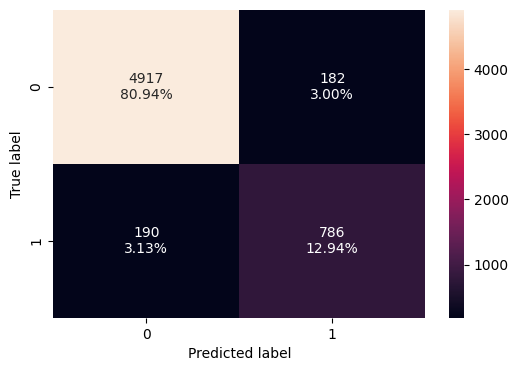

In [211]:
confusion_matrix_sklearn(dtree_tuned, X_train, y_train)

In [212]:
dtree_tuned_scores = model_performance_classification_sklearn(dtree_tuned, X_train, y_train)
dtree_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.939,0.805,0.812,0.809


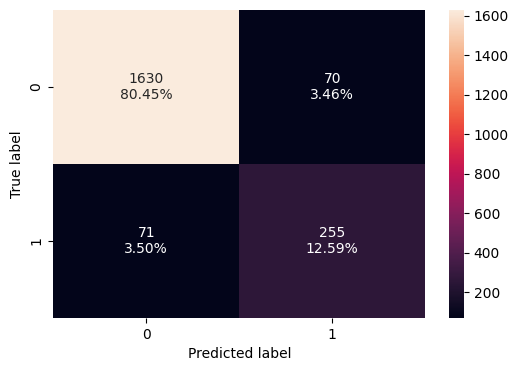

In [213]:
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

In [214]:
dtree_tuned_val_scores = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
dtree_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.930,0.782,0.785,0.783


#### Sample tuning method for Decision tree with oversampled data

In [282]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9019465450557063:


In [281]:
dtree_tuned_over = DecisionTreeClassifier(
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=4,
    random_state=1,
)
dtree_tuned_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [283]:
dtree_over_tuned_scores = model_performance_classification_sklearn(dtree_tuned_over, X_train_over, y_train_over)
dtree_over_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.916,0.914,0.918,0.916


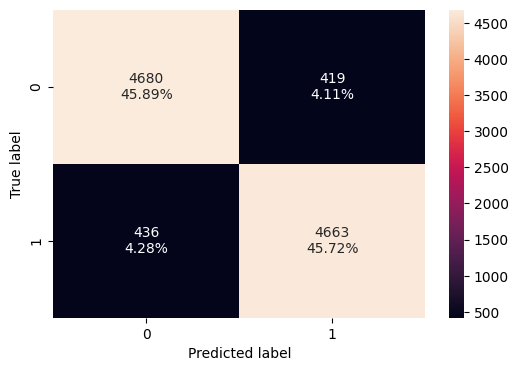

In [284]:
confusion_matrix_sklearn(dtree_tuned_over, X_train_over, y_train_over)

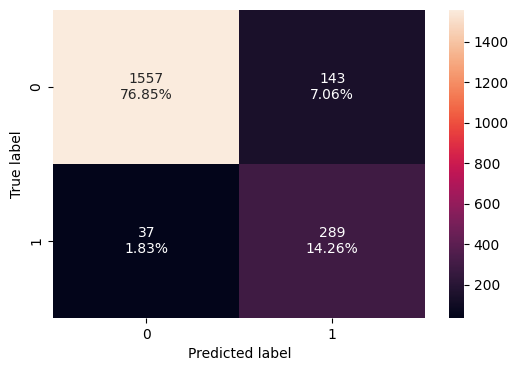

In [285]:
confusion_matrix_sklearn(dtree_tuned_over, X_val, y_val)

In [286]:
dtree_over_tuned_val_scores = model_performance_classification_sklearn(dtree_tuned_over, X_val, y_val)
dtree_over_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.911,0.887,0.669,0.763


#### Sample tuning method for Decision tree with undersampled data

In [287]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8934432234432235:


In [288]:
dtree_tuned_un = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5,
    random_state=1,
)
dtree_tuned_un.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

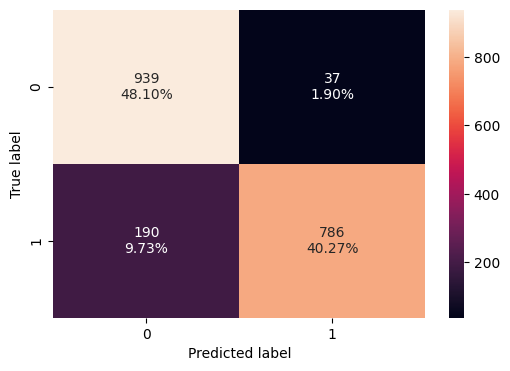

In [289]:
confusion_matrix_sklearn(dtree_tuned_un, X_train_un, y_train_un)

In [290]:
dtree_under_tuned_scores = model_performance_classification_sklearn(dtree_tuned_un, X_train_un, y_train_un)
dtree_under_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.884,0.805,0.955,0.874


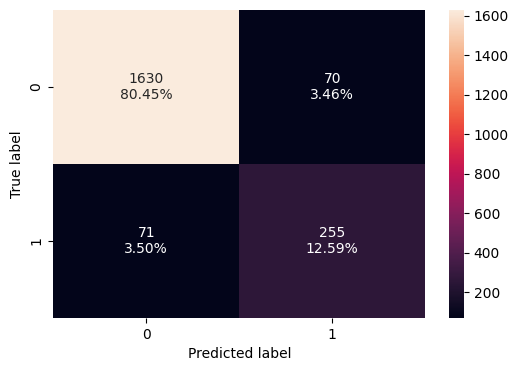

In [291]:
confusion_matrix_sklearn(dtree_tuned_un, X_val, y_val)

In [292]:
dtree_under_tuned_val_scores = model_performance_classification_sklearn(dtree_tuned_un, X_val, y_val)
dtree_under_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.930,0.782,0.785,0.783


Gradient Boosting with Original Data


In [227]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Save best parameters and CV score
best_params_gbm_orig = randomized_cv.best_params_
best_score_gbm_orig = randomized_cv.best_score_

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.7683987441130298:


In [228]:
gbm_tuned = GradientBoostingClassifier(
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1),
)
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, subsample=0.7)

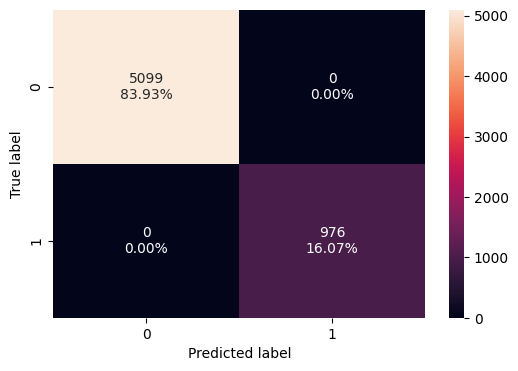

In [229]:
confusion_matrix_sklearn(gbm_tuned, X_train, y_train)

In [230]:
GBM_tuned_scores = model_performance_classification_sklearn(gbm_tuned, X_train, y_train)
GBM_tuned_scores

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


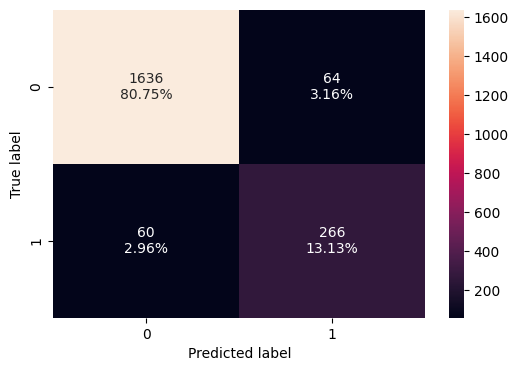

In [231]:
confusion_matrix_sklearn(gbm_tuned, X_val, y_val)

In [232]:
GBM_tuned_val_scores = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
GBM_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.939,0.816,0.806,0.811


Gradient Boosting with Oversampled Data

In [233]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)
randomized_cv.fit(X_train_over, y_train_over)
best_params_gbm_over = randomized_cv.best_params_
best_score_gbm_over = randomized_cv.best_score_

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9266628182185533:


In [234]:
gbm_tuned_over = GradientBoostingClassifier(
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1),
)
gbm_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, subsample=0.7)

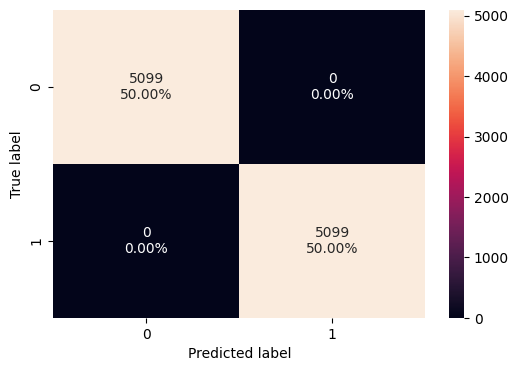

In [235]:
confusion_matrix_sklearn(gbm_tuned_over, X_train_over, y_train_over)

In [236]:
GBM_over_tuned_scores = model_performance_classification_sklearn(gbm_tuned_over, X_train_over, y_train_over)
GBM_over_tuned_scores

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


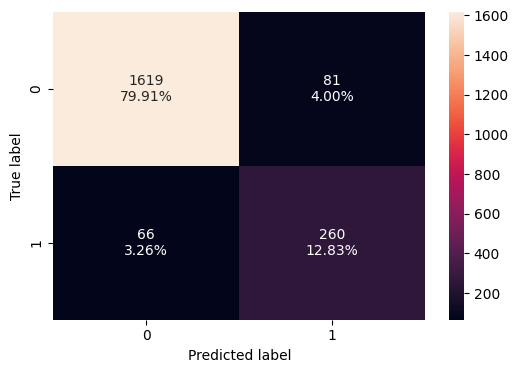

In [237]:
confusion_matrix_sklearn(gbm_tuned_over, X_val, y_val)


In [238]:
GBM_over_tuned_val_scores = model_performance_classification_sklearn(gbm_tuned_over, X_val, y_val)
GBM_over_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.927,0.798,0.762,0.780


Gradient Boosting with Undersampled Data


In [239]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)
randomized_cv.fit(X_train_un, y_train_un)
best_params_gbm_under = randomized_cv.best_params_
best_score_gbm_under = randomized_cv.best_score_

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8873207744636316:


In [240]:
gbm_tuned_under = GradientBoostingClassifier(
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1),
)
gbm_tuned_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, subsample=0.7)

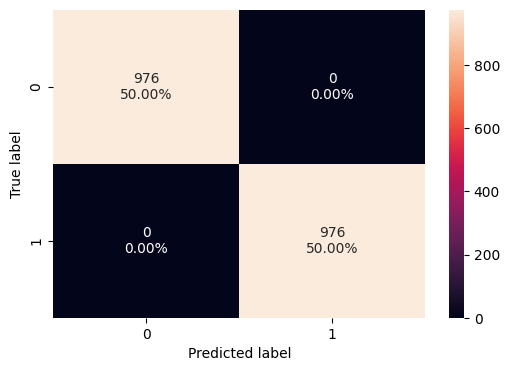

In [241]:
confusion_matrix_sklearn(gbm_tuned_under, X_train_un, y_train_un)

In [242]:
GBM_under_tuned_scores = model_performance_classification_sklearn(gbm_tuned_under, X_train_un, y_train_un)
GBM_under_tuned_scores

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


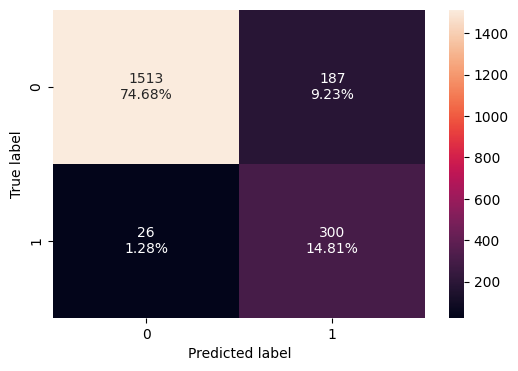

In [243]:
confusion_matrix_sklearn(gbm_tuned_under, X_val, y_val)

In [244]:
GBM_under_tuned_val_scores = model_performance_classification_sklearn(gbm_tuned_under, X_val, y_val)
GBM_under_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.895,0.920,0.616,0.738


AdaBoost (original training data)

In [245]:
Ada_org = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7899529042386184:


In [246]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
ada_org_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the original training data.
ada_org_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [247]:
ada_tuned_scores = model_performance_classification_sklearn(ada_org_tuned, X_train, y_train)
ada_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.964,0.835,0.934,0.882


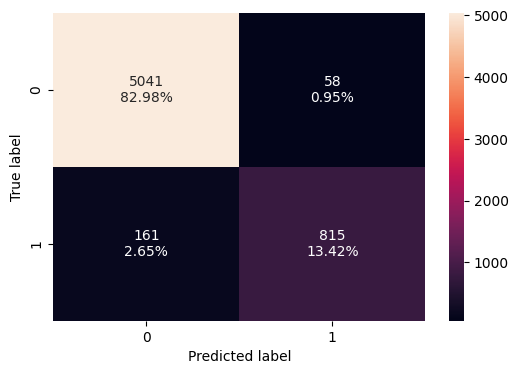

In [248]:
confusion_matrix_sklearn(ada_org_tuned, X_train, y_train)

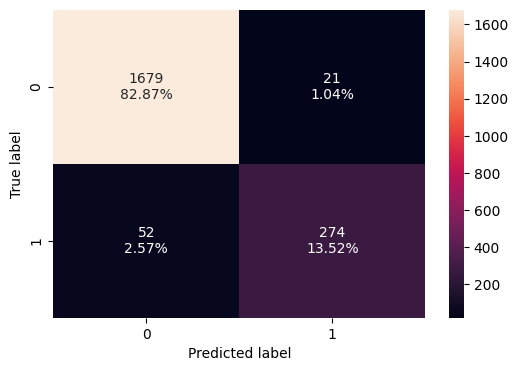

In [249]:
confusion_matrix_sklearn(ada_org_tuned, X_val, y_val)

In [250]:
ada_tuned_val_scores = model_performance_classification_sklearn(ada_org_tuned, X_val, y_val)
ada_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.964,0.840,0.929,0.882


AdaBoost (oversampled training data)


In [251]:
ada_over = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=ada_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9448950335777097:


In [252]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
ada_over_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the original training data.
ada_over_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, random_state=1)

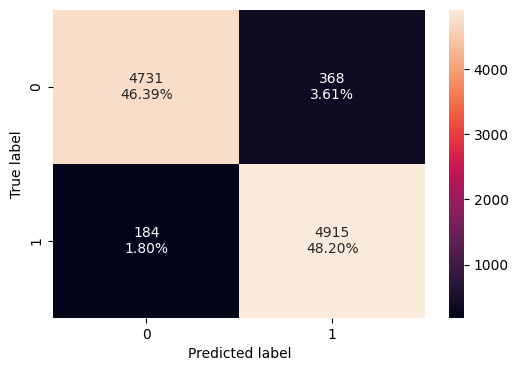

In [253]:
confusion_matrix_sklearn(ada_over_tuned, X_train_over, y_train_over)

In [254]:
ada_over_tuned_scores = model_performance_classification_sklearn(ada_over_tuned, X_train_over, y_train_over)
ada_over_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.946,0.964,0.930,0.947


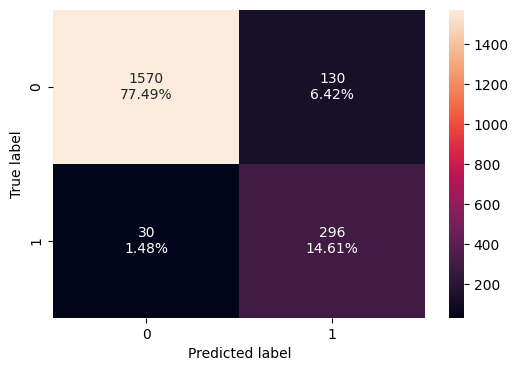

In [255]:
confusion_matrix_sklearn(ada_over_tuned, X_val, y_val)

In [256]:
ada_over_tuned_val_scores = model_performance_classification_sklearn(ada_over_tuned, X_val, y_val)
ada_over_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.921,0.908,0.695,0.787


AdaBoost (undersampled training data)


In [257]:
ada_under = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=ada_under, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9436630036630037:


In [258]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
ada_under_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the original training data.
ada_under_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

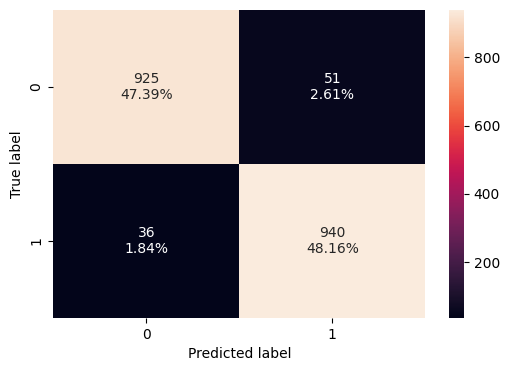

In [259]:
confusion_matrix_sklearn(ada_under_tuned, X_train_un, y_train_un)

In [260]:
ada_under_tuned_scores = model_performance_classification_sklearn(ada_under_tuned, X_train_un, y_train_un)
ada_under_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.955,0.963,0.949,0.956


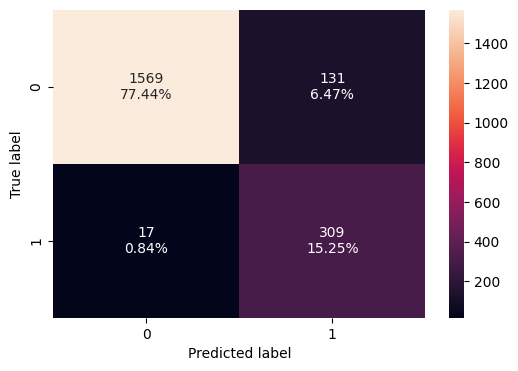

In [261]:
confusion_matrix_sklearn(ada_under_tuned, X_val, y_val)

In [262]:
ada_under_tuned_val_scores = model_performance_classification_sklearn(ada_under_tuned, X_val, y_val)
ada_under_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.927,0.948,0.702,0.807


Random Forest (Original Data)

In [263]:
# Defining the model.
RF = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7438147566718996:


In [264]:
RF_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

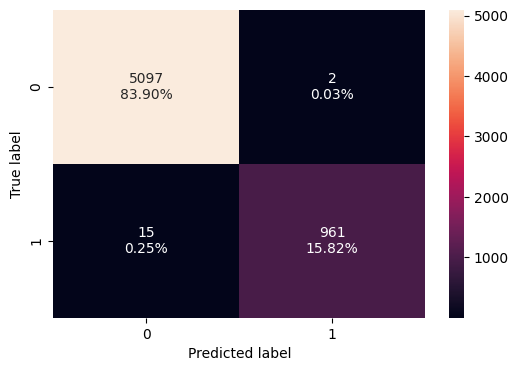

In [265]:
confusion_matrix_sklearn(RF_tuned, X_train, y_train)

In [266]:
rf_tuned_scores = model_performance_classification_sklearn(RF_tuned, X_train, y_train)
rf_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.997,0.985,0.998,0.991


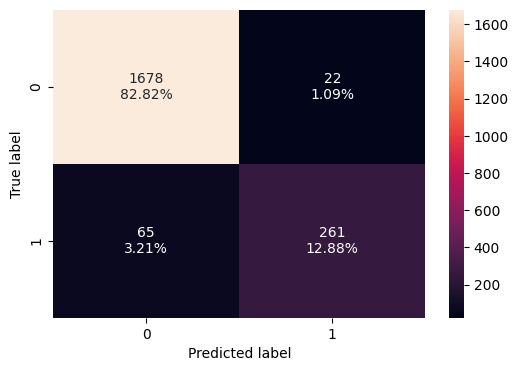

In [267]:
confusion_matrix_sklearn(RF_tuned, X_val, y_val)

In [268]:
rf_tuned_val_scores = model_performance_classification_sklearn(RF_tuned, X_val, y_val)
rf_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.957,0.801,0.922,0.857


Random Forest (undersampled training data)

In [269]:
# Defining the model.
RF_un = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.930319204604919:


In [270]:
RF_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [271]:
rf_under_tuned_scores = model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)
rf_under_tuned_scores

,Accuracy,Recall,Precision,F1
0,0.996,0.999,0.994,0.996


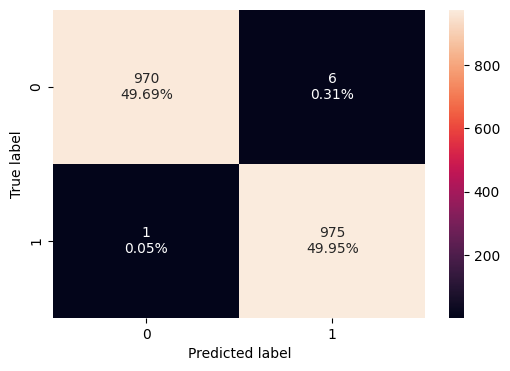

In [272]:
confusion_matrix_sklearn(RF_un_tuned, X_train_un, y_train_un)


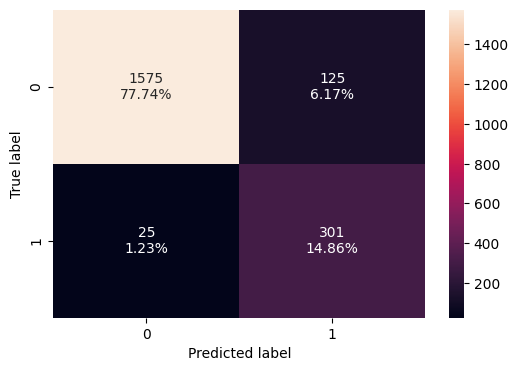

In [273]:
confusion_matrix_sklearn(RF_un_tuned, X_val, y_val)

In [274]:
rf_under_tuned_val_scores = model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)
rf_under_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.926,0.923,0.707,0.801


Random Forest (Oversampled Data)

In [275]:
# Defining the model.
RF_over = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9513723565972022:


In [276]:
RF_over_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_over_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

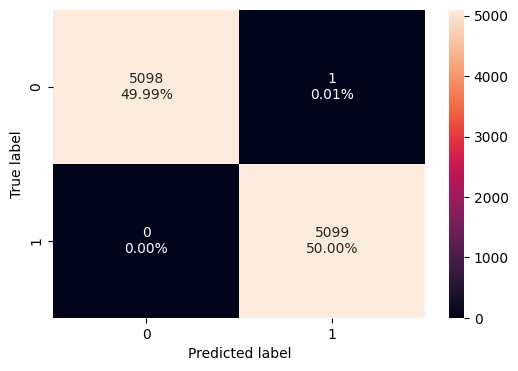

In [277]:
confusion_matrix_sklearn(RF_over_tuned, X_train_over, y_train_over)

In [278]:
rf_over_tuned_scores = model_performance_classification_sklearn(RF_over_tuned, X_train_over, y_train_over)
rf_over_tuned_scores

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


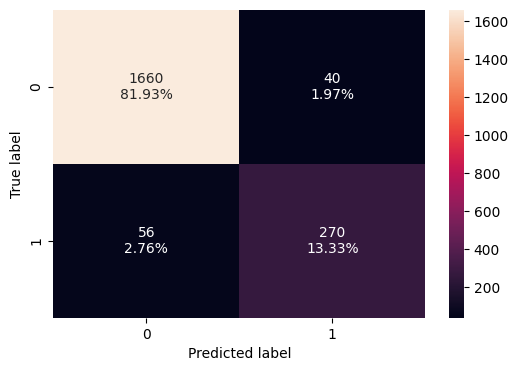

In [279]:
confusion_matrix_sklearn(RF_over_tuned, X_val, y_val)

In [280]:
rf_over_tuned_val_scores = model_performance_classification_sklearn(RF_over_tuned, X_val, y_val)
rf_over_tuned_val_scores

,Accuracy,Recall,Precision,F1
0,0.953,0.828,0.871,0.849


## Model Comparison and Final Model Selection

In [299]:
# Training performance comparison.

models_train_comp_df = pd.concat(
    [
        dtree_tuned_scores.T,
        GBM_tuned_scores.T,
        ada_tuned_scores.T,
        rf_tuned_scores.T,
        dtree_under_tuned_scores.T,
        GBM_under_tuned_scores.T,
        ada_under_tuned_scores.T,
        rf_under_tuned_scores.T,
        dtree_over_tuned_scores.T,
        GBM_over_tuned_scores.T,
        ada_over_tuned_scores.T,
        rf_over_tuned_scores.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
      "DT trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "Random Forest trained with Original data",
      "DT trained with Undersampled data",
      "Gradient boosting trained with Undersampled data",
      "AdaBoost trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "DT trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Random Forest trained with Oversampled data"


]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,DT trained with Original data,Gradient boosting trained with Original data,AdaBoost trained with Original data,Random Forest trained with Original data,DT trained with Undersampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data,Random Forest trained with Undersampled data,DT trained with Oversampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Random Forest trained with Oversampled data
Accuracy,0.939,1.000,0.964,0.997,0.884,1.000,0.955,0.996,0.916,1.000,0.946,1.000
Recall,0.805,1.000,0.835,0.985,0.805,1.000,0.963,0.999,0.914,1.000,0.964,1.000
Precision,0.812,1.000,0.934,0.998,0.955,1.000,0.949,0.994,0.918,1.000,0.930,1.000
F1,0.809,1.000,0.882,0.991,0.874,1.000,0.956,0.996,0.916,1.000,0.947,1.000


### Test set final performance

In [300]:
models_val_comp_df = pd.concat(
    [
        dtree_tuned_val_scores.T,
        GBM_tuned_val_scores.T,
        ada_tuned_val_scores.T,
        rf_tuned_val_scores.T,
        dtree_under_tuned_val_scores.T,
        GBM_under_tuned_val_scores.T,
        ada_under_tuned_val_scores.T,
        rf_under_tuned_val_scores.T,
        dtree_over_tuned_val_scores.T,
        GBM_over_tuned_val_scores.T,
        ada_over_tuned_val_scores.T,
        rf_over_tuned_val_scores.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
      "DT trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "Random Forest trained with Original data",
      "DT trained with Undersampled data",
      "Gradient boosting trained with Undersampled data",
      "AdaBoost trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "DT trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Random Forest trained with Oversampled data"


]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,DT trained with Original data,Gradient boosting trained with Original data,AdaBoost trained with Original data,Random Forest trained with Original data,DT trained with Undersampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data,Random Forest trained with Undersampled data,DT trained with Oversampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Random Forest trained with Oversampled data
Accuracy,0.930,0.939,0.964,0.957,0.930,0.895,0.927,0.926,0.911,0.927,0.921,0.953
Recall,0.782,0.816,0.840,0.801,0.782,0.920,0.948,0.923,0.887,0.798,0.908,0.828
Precision,0.785,0.806,0.929,0.922,0.785,0.616,0.702,0.707,0.669,0.762,0.695,0.871
F1,0.783,0.811,0.882,0.857,0.783,0.738,0.807,0.801,0.763,0.780,0.787,0.849


In [301]:
# Top 3 tuned model performance test scores
RF_under_tuned_test_scores = model_performance_classification_sklearn(RF_un_tuned, X_test, y_test)
ada_under_tuned_test_scores = model_performance_classification_sklearn(ada_under_tuned, X_test, y_test)
GBM_under_tuned_test_scores = model_performance_classification_sklearn(gbm_tuned_under, X_test, y_test)


# Top 3 model test performance scores
models_test_comp_df = pd.concat(
    [
        RF_under_tuned_test_scores.T,
        ada_under_tuned_test_scores.T,
        GBM_under_tuned_test_scores.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data",
      "GBM trained with Undersampled data"
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Random Forest trained with Undersampled data,AdaBoost trained with Undersampled data,GBM trained with Undersampled data
Accuracy,0.928,0.923,0.886
Recall,0.954,0.957,0.926
Precision,0.703,0.687,0.594
F1,0.809,0.799,0.724


*   The model with highest recall score on test data was chosen for final model.
*  This selected model is AdaBoost model that was tuned and trained on undersampled training data which has recall of 95.7%

In [302]:
model_selected = ada_under_tuned
model_performance_classification_sklearn(model_selected, X_test, y_test)


,Accuracy,Recall,Precision,F1
0,0.923,0.957,0.687,0.799


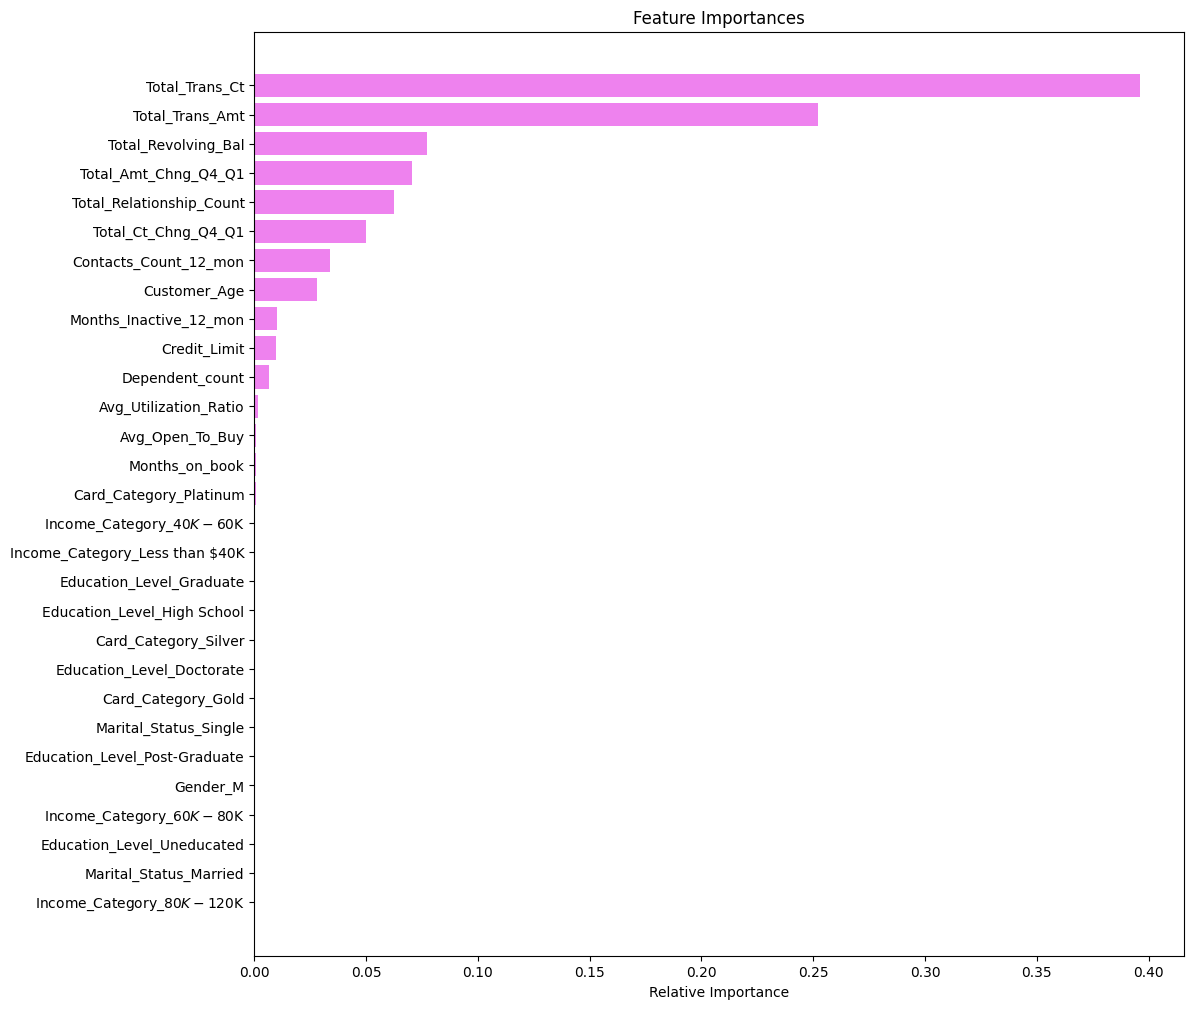

In [303]:
# Feature Importance

feature_names = X_train.columns
importances =  model_selected.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


* The most important features of the data set are:
  * Total_Trans_Ct
  * Total_Trans_Amt
  * Total_Revolving_Bal
  * Total_Amt_Chng_Q4_Q1
  * Total_Relationship_Ct
  * Total_Ct_Chng_Q4_Q1


# Business Insights and Conclusions



*   The total transaction amount and total transaction count are the most important factors as derived from the best selected model that determine customer attrition.
The customers who have lesser total transaction amount and less transactions with the bank are most likely to discontinue their credit card with the bank.
* The total revolving balance is also important as customers with extremely hugh revolving balance are likely to attrite than ones with low to moderate revolving balance. Customers with extremely high balance are likely to default and the ones who keep it moderate will make payments and keep their balance in control.
* Total_Ct_Chg_Q4_Q1 is higher for existing customers, indicating existing customers are more likely to spend later in the year than attrited customers.
* Total Relationship Count greater than or equal to 3 are less likely to attrite than customer with fewer products with the bank.
Bank should promote their other products to the customers so they will likely stay with them.
*   From Exploratory data analysis, other than the most important features above we found some features of customers who are likely to attrite so the bank should offer some credit card category aimed at customers with below attributes:
  *   Doctrate degree
  *   Contacted 6 or more times
  *   Avg. ultilization ratio: 0.3%
  
*   The banks should focus on customer engagement and provide incentives for increased usage of credit card including reward points, cashback offers, etc.
*   The bank should send out customer satisfaction surveys to help identify the concerns of the customers and identify if they are likely to attrite based on their satisfaction score.








***